In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/charlottefelius/documents/wids2022/WIDS/data/train.csv")
sub = pd.read_csv("/Users/charlottefelius/documents/wids2022/WIDS/data/test.csv")

In [3]:
data.head(2)
sub.head(2)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758


In [43]:
sub.Year_Factor.unique()

array([7])

In [4]:
print("Amount of rows and cols respectively (testset)")
print(str(len(sub)) + ", " + str(len(sub.columns)) + "\n")
print("Column names:")
print([i.strip("\n") for i in sub.columns])
print()
# print("Missing data:")
# print(data.describe())

Amount of rows and cols respectively (testset)
9705, 63

Column names:
['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 

In [5]:
print("Amount of rows and cols respectively")
print(str(len(data)) + ", " + str(len(data.columns)) + "\n")
print("Column names:")
print([i.strip("\n") for i in data.columns])
print()
# print("Missing data:")
# print(data.describe())

Amount of rows and cols respectively
75757, 64

Column names:
['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp

#### Missing data entries

In [6]:
def missing_data(dataframe):
    
    """
    
    Method for calculating missing data
    input: dataframe
    output: sorted list (descending) with colname, #missing values and percentage of total values
    
    """
    
    length = len(dataframe)
    missing = []
    
    for column in dataframe.columns:
        difference = length - dataframe[column].count()
        
        if difference > 0:
            missing.append((column, difference, str('{0:.2f}'.format(difference/length*100)) +"%"))
    
    missing.sort(key = lambda x: x[1], reverse=True)
    
    return missing
        
result = missing_data(data)
result2 = missing_data(sub)

for i in result:
    print(i)

print()
print("Missing values testset:")

for i in result2:
    print(i)

('days_with_fog', 45796, '60.45%')
('direction_peak_wind_speed', 41811, '55.19%')
('direction_max_wind_speed', 41082, '54.23%')
('max_wind_speed', 41082, '54.23%')
('energy_star_rating', 26709, '35.26%')
('year_built', 1837, '2.42%')

Missing values testset:
('days_with_fog', 9117, '93.94%')
('direction_max_wind_speed', 8575, '88.36%')
('direction_peak_wind_speed', 8575, '88.36%')
('max_wind_speed', 8575, '88.36%')
('energy_star_rating', 2254, '23.23%')
('year_built', 92, '0.95%')


In [7]:
# year built probably missing if built a long time ago, hence impute with some things.
# delete everything with higher then 50 percent missing stuff


In [8]:
#### Data types
data.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [9]:
for i, j in data.dtypes.iteritems():
    print(i, j)

Year_Factor int64
State_Factor object
building_class object
facility_type object
floor_area float64
year_built float64
energy_star_rating float64
ELEVATION float64
january_min_temp int64
january_avg_temp float64
january_max_temp int64
february_min_temp int64
february_avg_temp float64
february_max_temp int64
march_min_temp int64
march_avg_temp float64
march_max_temp int64
april_min_temp int64
april_avg_temp float64
april_max_temp int64
may_min_temp int64
may_avg_temp float64
may_max_temp int64
june_min_temp int64
june_avg_temp float64
june_max_temp int64
july_min_temp int64
july_avg_temp float64
july_max_temp int64
august_min_temp int64
august_avg_temp float64
august_max_temp int64
september_min_temp int64
september_avg_temp float64
september_max_temp int64
october_min_temp int64
october_avg_temp float64
october_max_temp int64
november_min_temp int64
november_avg_temp float64
november_max_temp int64
december_min_temp int64
december_avg_temp float64
december_max_temp int64
cooling_degree

In [10]:
# State_Factor object
# building_class object
# facility_type object
objecttypes = ["State_Factor", "building_class", "facility_type", "Year_Factor", "year_built", "energy_star_rating"]

for col in objecttypes:
    print(col)
    print(data[col].unique())
    print()

State_Factor
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']

building_class
['Commercial' 'Residential']

facility_type
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assemb

In [11]:
res = data.loc[data["building_class"] == 'Residential']["facility_type"].unique()

In [12]:
sub.loc[sub["building_class"] == 'Commercial']["facility_type"].value_counts()

Office_Uncategorized                         1919
Education_Other_classroom                     890
Lodging_Hotel                                 367
Commercial_Other                              325
Retail_Uncategorized                          225
Education_College_or_university               202
Warehouse_Uncategorized                       157
Nursing_Home                                  151
Grocery_store_or_food_market                  135
Religious_worship                             125
Warehouse_Nonrefrigerated                     110
Office_Medical_non_diagnostic                 100
Lodging_Dormitory_or_fraternity_sorority       99
Warehouse_Distribution_or_Shipping_center      94
Warehouse_Selfstorage                          80
Health_Care_Inpatient                          76
Industrial                                     47
Laboratory                                     44
Retail_Strip_shopping_mall                     37
Parking_Garage                                 37


In [13]:
data.loc[data["building_class"] == 'Commercial']["facility_type"].value_counts()

Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
Commercial_Other                              1744
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship                              399
Industrial                                     384
Warehouse_Uncategorized                        330
Parking_Garage                                 251
Office_Bank_or_other_financial 

In [14]:
com = data.loc[data["building_class"] == 'Commercial']["facility_type"].unique()

In [15]:
set(res) - set(com)

{'2to4_Unit_Building',
 '5plus_Unit_Building',
 'Mixed_Use_Commercial_and_Residential',
 'Mixed_Use_Predominantly_Commercial',
 'Mixed_Use_Predominantly_Residential',
 'Multifamily_Uncategorized'}

In [16]:
data.facility_type

0                     Grocery_store_or_food_market
1        Warehouse_Distribution_or_Shipping_center
2                             Retail_Enclosed_mall
3                        Education_Other_classroom
4                        Warehouse_Nonrefrigerated
                           ...                    
75752                         Office_Uncategorized
75753                          5plus_Unit_Building
75754                             Commercial_Other
75755                             Commercial_Other
75756                           2to4_Unit_Building
Name: facility_type, Length: 75757, dtype: object

#### Distribution of values

In [17]:
def distribution_plots(dataframe):
    
    """
    
    input: dataframe
    output: plots with distribution of each column
    
    """
    
    for column in dataframe.columns:
        plt.hist(dataframe[column], bins = 35)
        plt.title(column)
        plt.show()

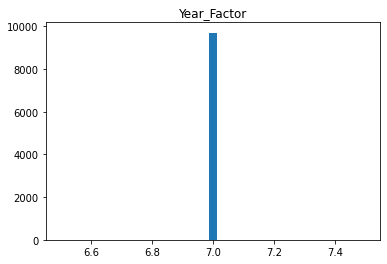

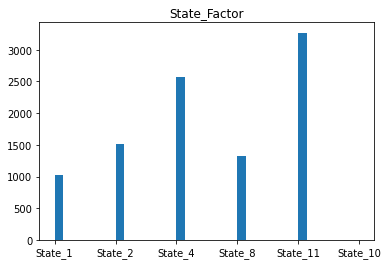

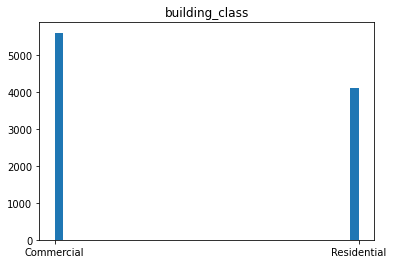

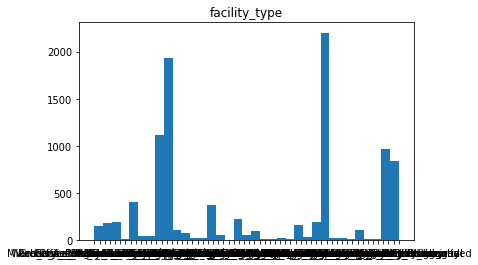

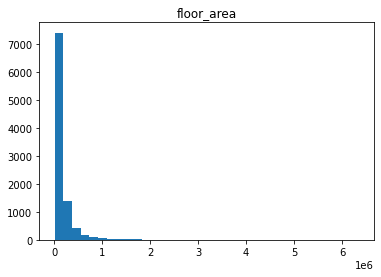

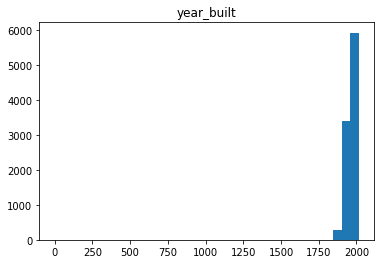

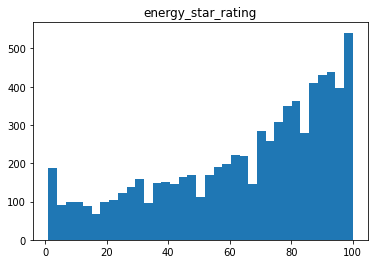

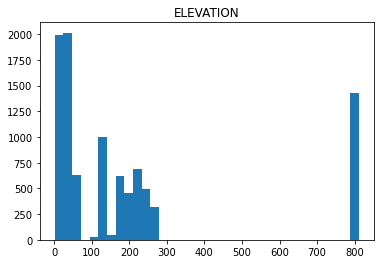

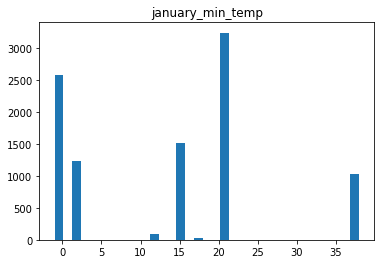

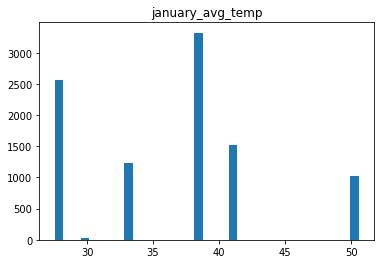

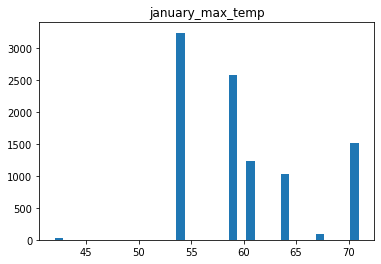

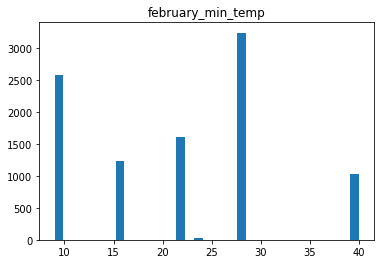

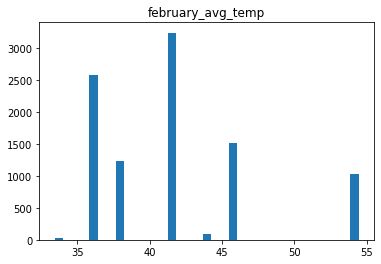

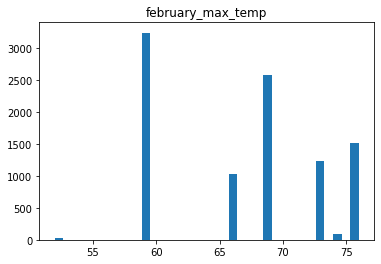

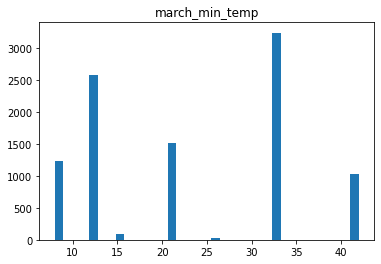

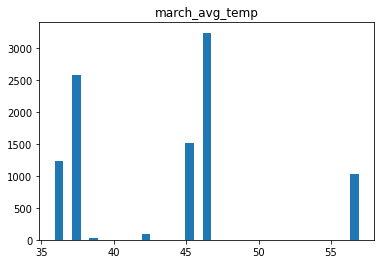

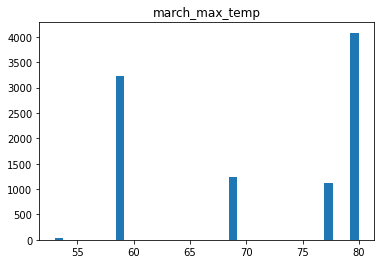

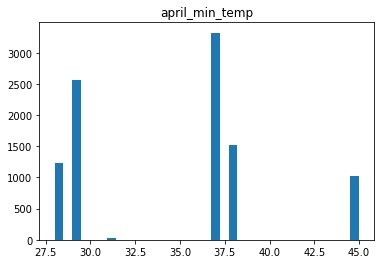

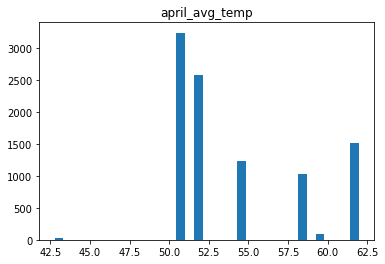

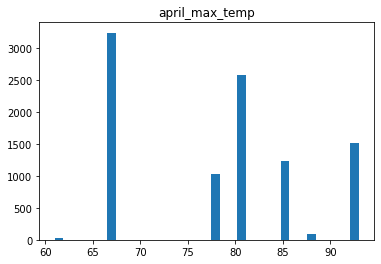

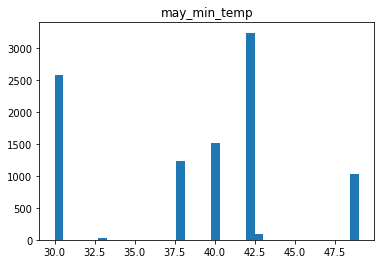

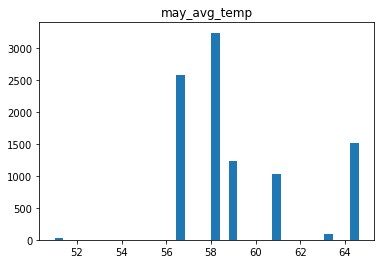

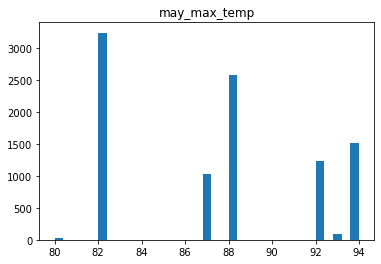

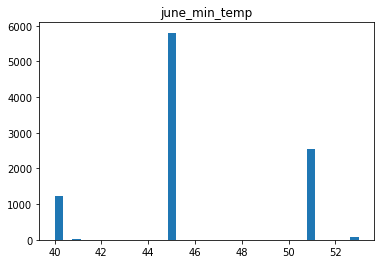

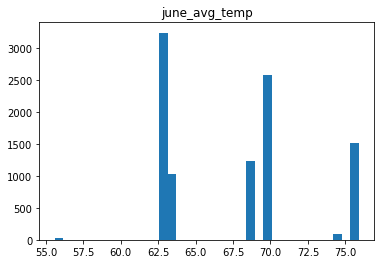

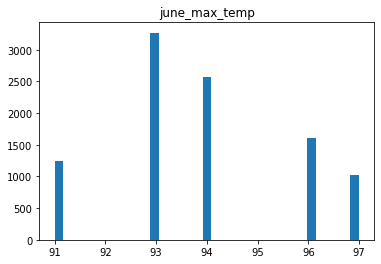

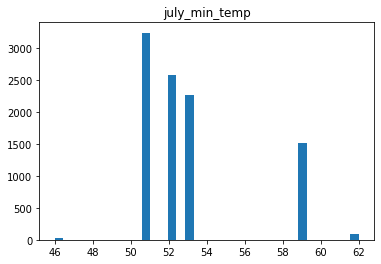

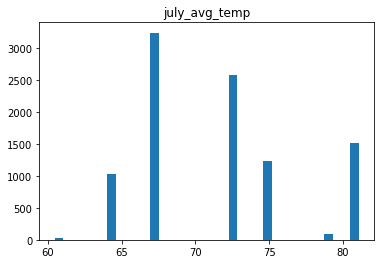

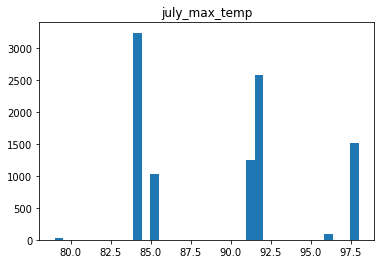

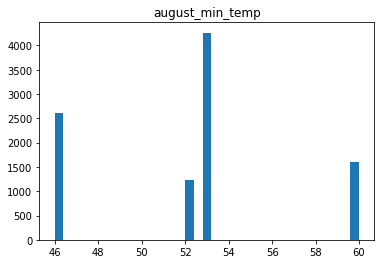

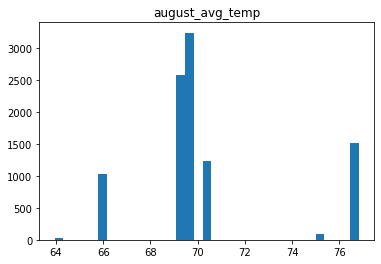

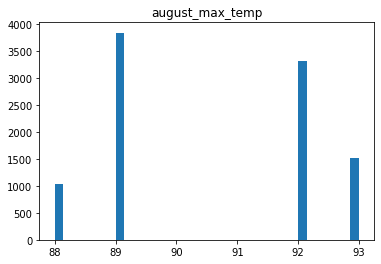

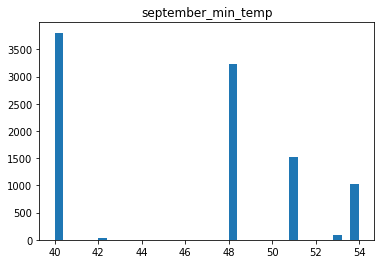

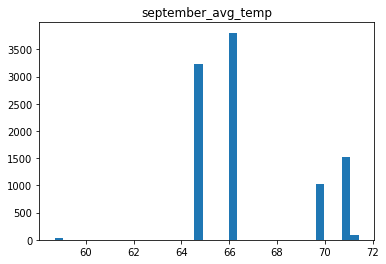

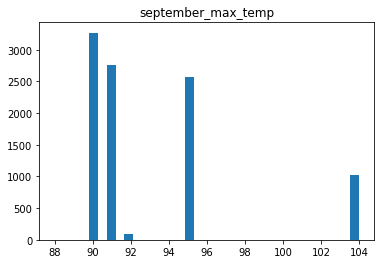

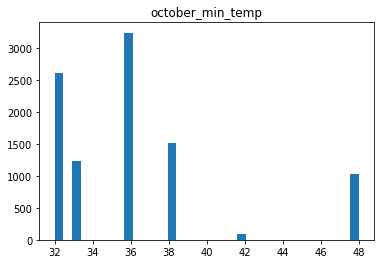

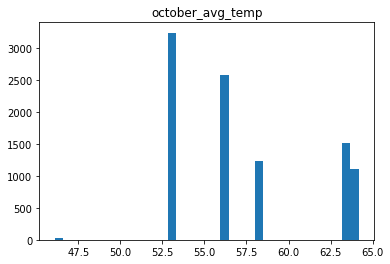

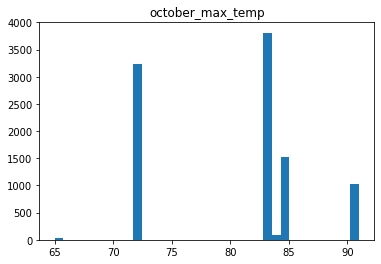

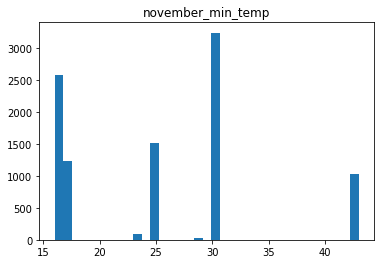

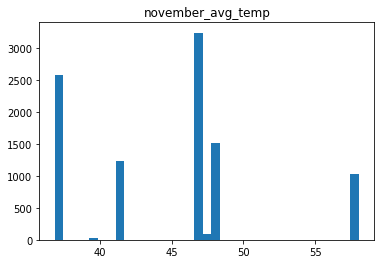

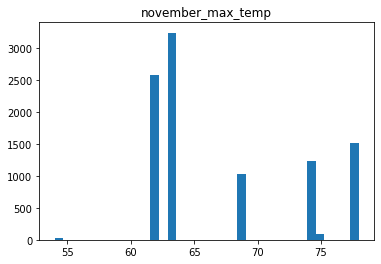

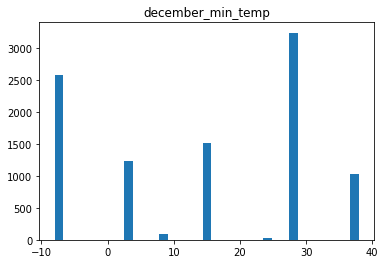

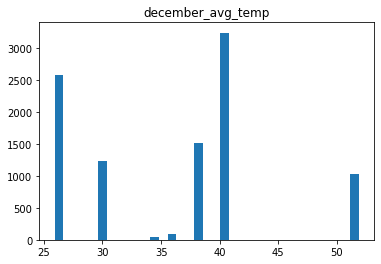

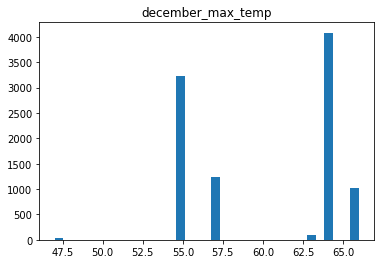

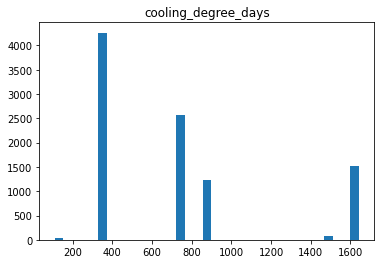

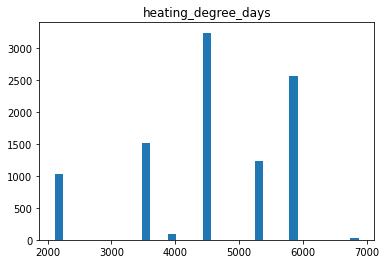

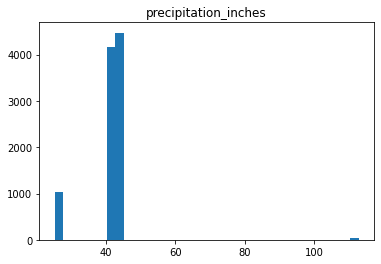

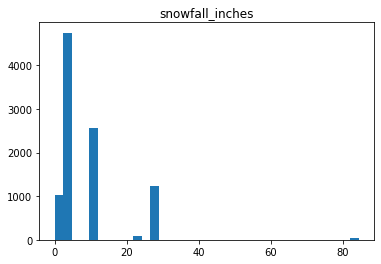

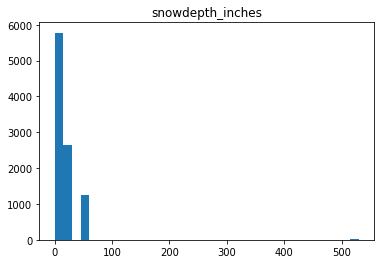

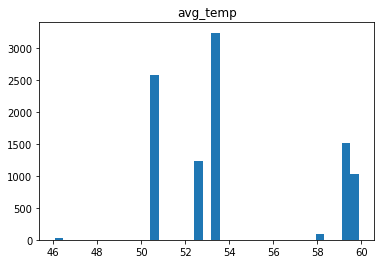

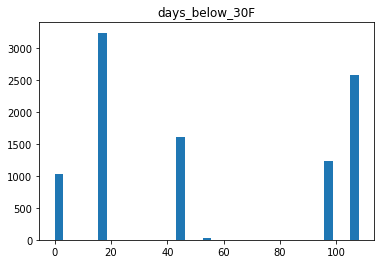

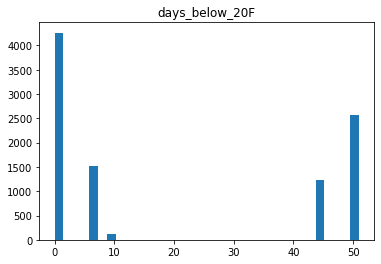

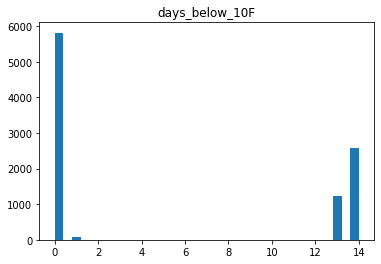

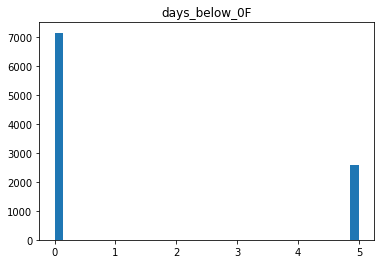

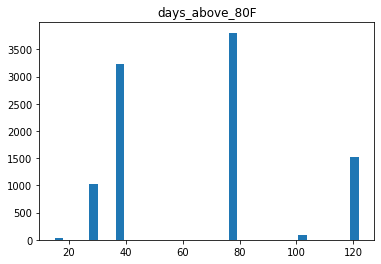

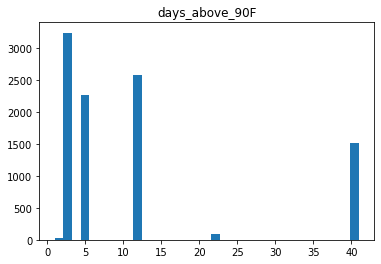

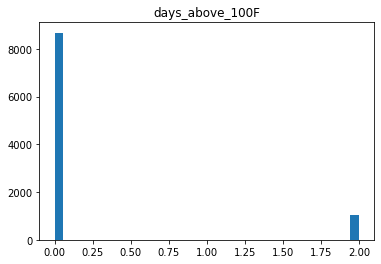

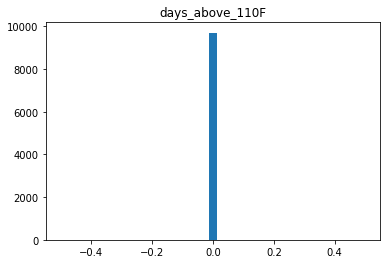

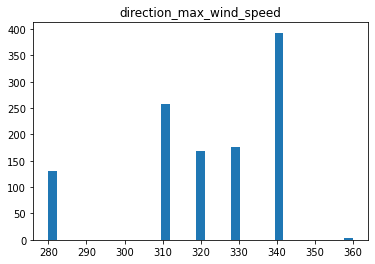

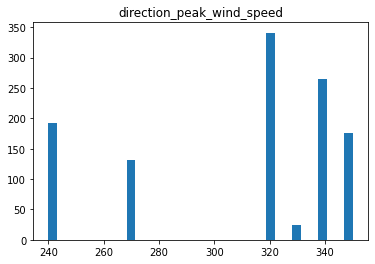

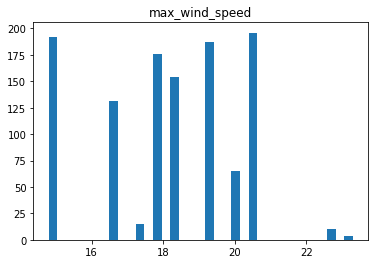

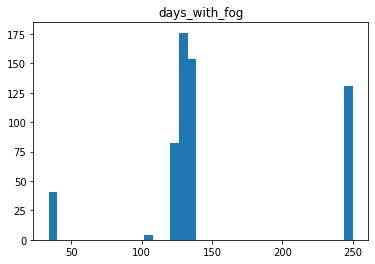

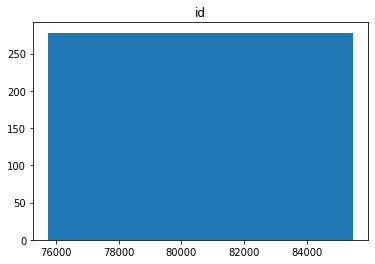

In [18]:
distribution_plots(sub)

#### Heatmap (correlations of columns)

<AxesSubplot:>

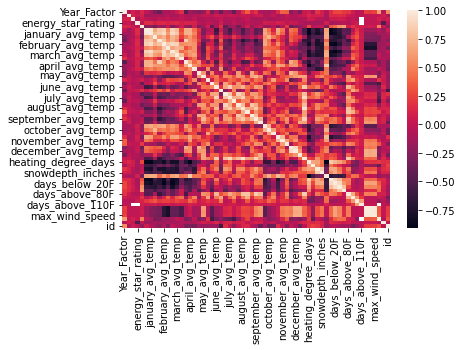

In [19]:
sns.heatmap(data.corr())

In [20]:
for i, j in data.corr()["year_built"].iteritems():
    if abs(j) > 0.1:
        print(i, j)

floor_area 0.10087800975469671
year_built 1.0
august_min_temp -0.10322982383299495
september_min_temp -0.12282296249298147
september_max_temp -0.1023124741650128
october_avg_temp -0.1260272034067651
october_max_temp -0.10442017159388108
avg_temp -0.1125549477862206


In [21]:
def check_correlation(dataframe,colname, min_corr = 0.1):
    
    """
    
    Checks the correlations from a column with all other columns
    input: column name -> string, min_corr -> float
    output: Ordered list with correlations
    
    """
    
    print(f"Correlations of '{colname}':")
    
    correlations = []

    for i, j in dataframe.corr()[colname].iteritems():
        if abs(j) > min_corr:
            correlations.append((i, abs(j)))

    correlations.sort(key = lambda x: x[1], reverse=True)
    
    return correlations

for i in check_correlation(data, "site_eui", 0):
    print(i)

Correlations of 'site_eui':
('site_eui', 1.0)
('energy_star_rating', 0.511012418414406)
('january_min_temp', 0.17919000747473737)
('january_avg_temp', 0.16798183449371404)
('snowfall_inches', 0.15728398332087143)
('february_avg_temp', 0.15407095769298448)
('heating_degree_days', 0.14786070810526808)
('february_min_temp', 0.14734831089089764)
('days_below_30F', 0.13981097964924044)
('march_avg_temp', 0.13530308837510602)
('march_min_temp', 0.13411027360694922)
('july_avg_temp', 0.13385567931734033)
('cooling_degree_days', 0.12500445903769586)
('june_avg_temp', 0.12201929369061462)
('days_below_20F', 0.11949168668628028)
('august_avg_temp', 0.11378631359946408)
('precipitation_inches', 0.11355811944209185)
('snowdepth_inches', 0.11337093630306648)
('april_avg_temp', 0.11300771625223847)
('april_min_temp', 0.11152837373866278)
('september_avg_temp', 0.10885328656840827)
('july_min_temp', 0.10809176073857583)
('february_max_temp', 0.10669253369793316)
('november_min_temp', 0.10034851051172

### Quick Findings

Based on above analysis, we try the following *as a starting point*.

> #### Delete the following columns
> - days_with_fog
> - direction_peak_wind_speed
> - direction_max_wind_speed
> - max_wind_speed
> - year_built
> - days_above_90F
> - days_above_110F
> - facility_type

> #### Impute missing values for energy_star_rating and year_built
> Imputing is done by taking the median

First tries are just a random forest model and xgboost.

#### Ideas

> - do PCA within years or something, construct new categories (like in titanic), then one hot encode
> - do something with average + st.dev of temperature or something! Write an algorythm that encapsulates this?
> - Keep in mind that huge differences in day and night are also importante
> - maybe take the diff (max-min) as a variable, normalize, multiply by normalized avg temperture per month.
> - sum al days above 80f and under 30f

In [50]:
# Energy star rating
dat2 = data.loc[data["energy_star_rating"].isnull()]
del dat2["energy_star_rating"]

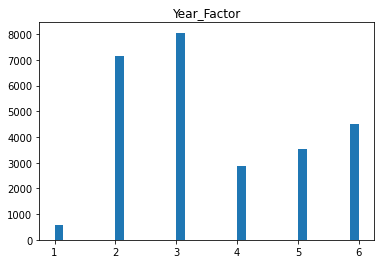

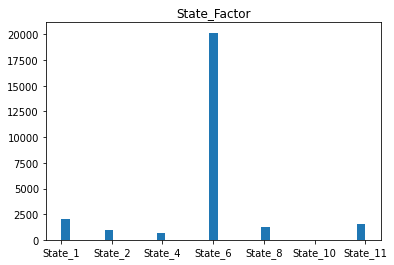

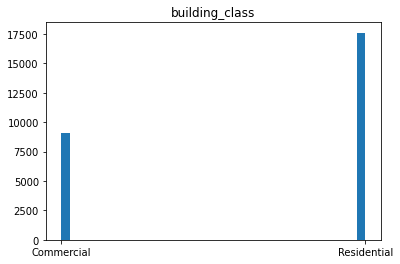

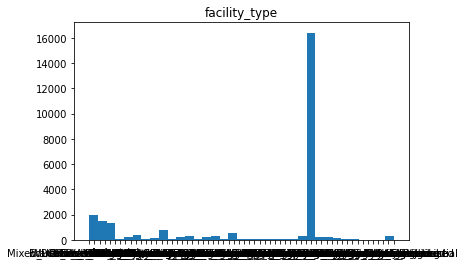

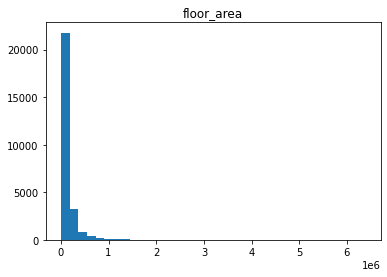

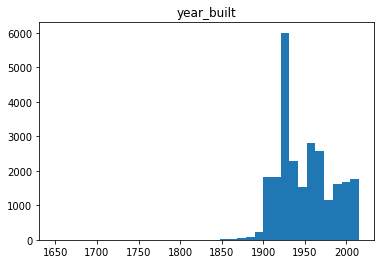

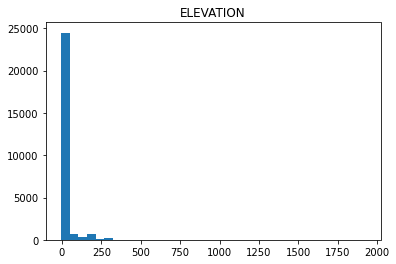

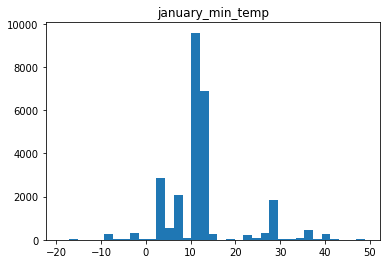

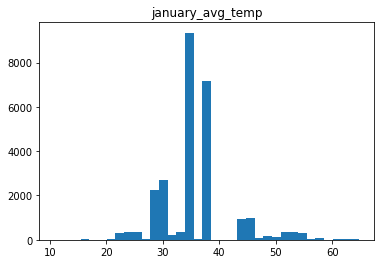

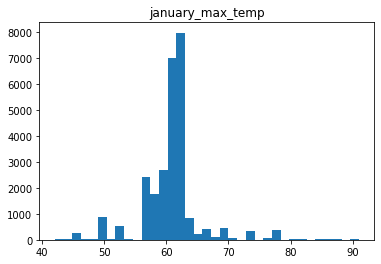

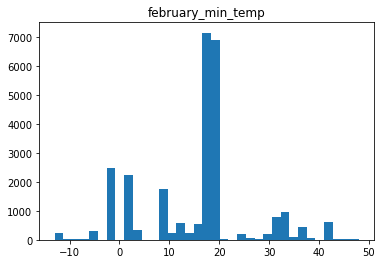

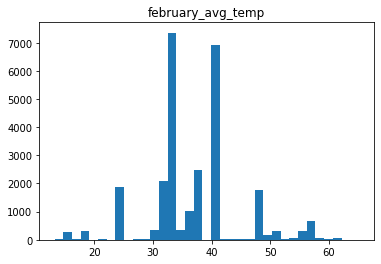

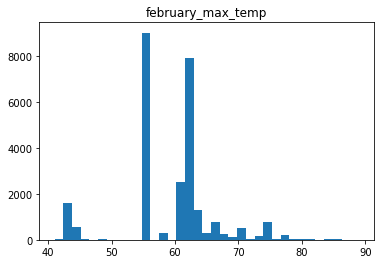

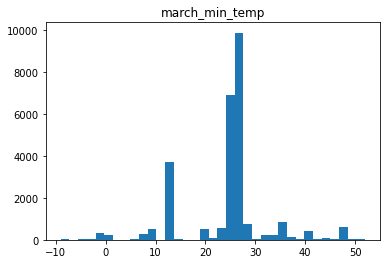

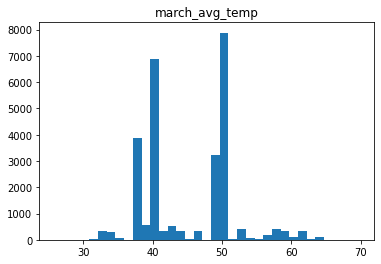

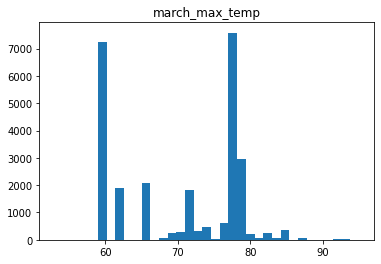

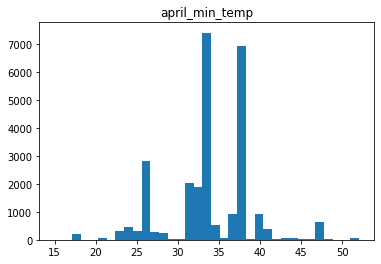

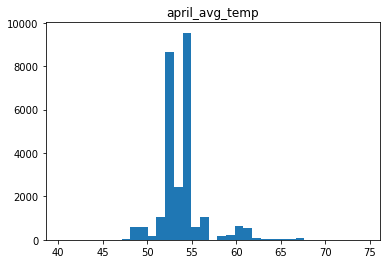

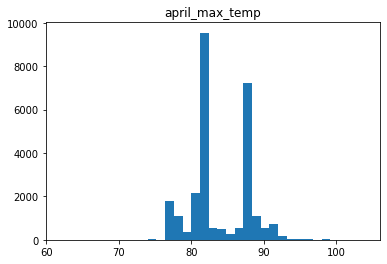

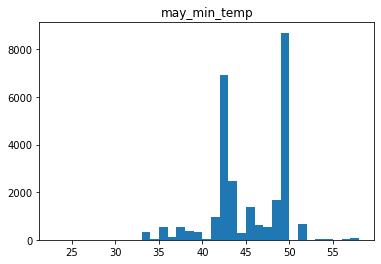

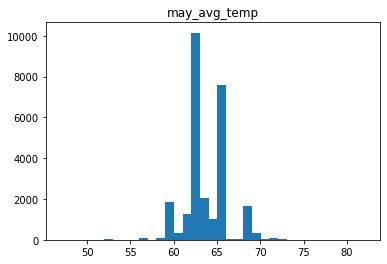

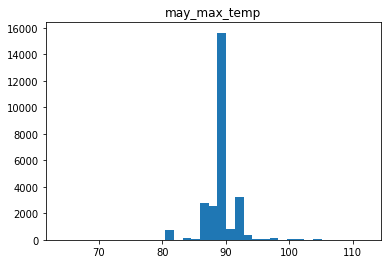

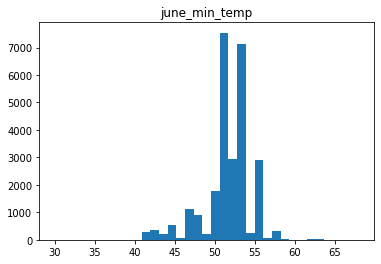

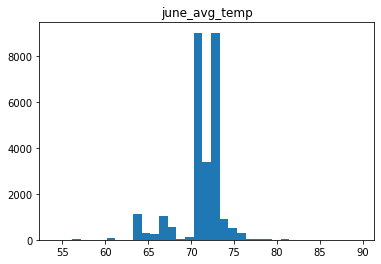

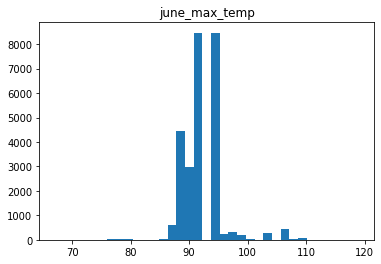

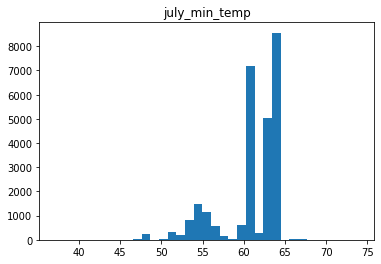

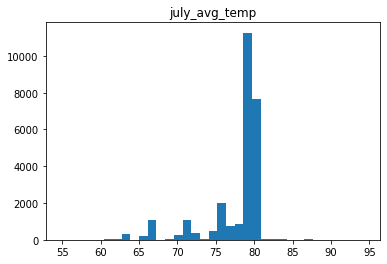

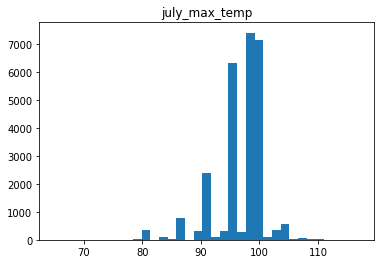

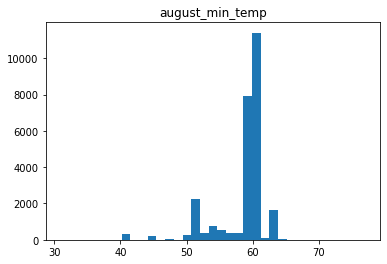

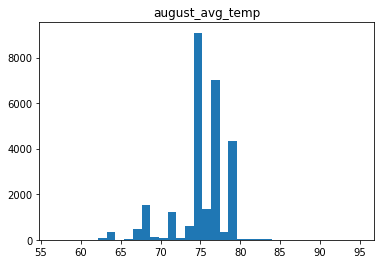

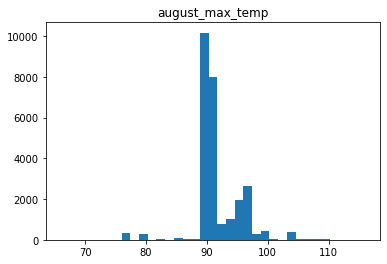

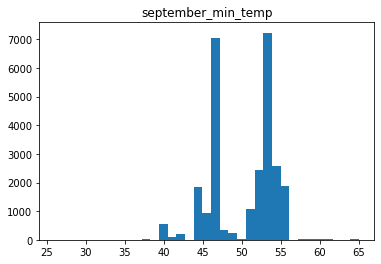

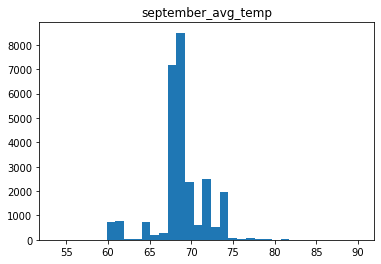

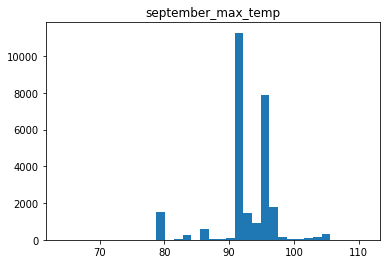

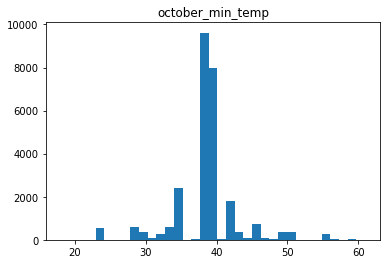

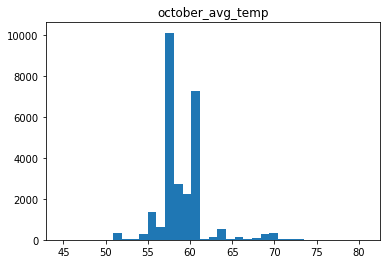

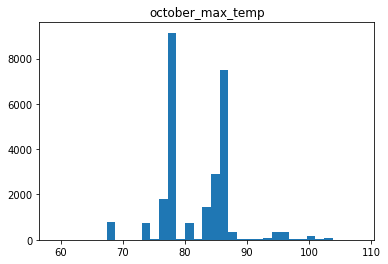

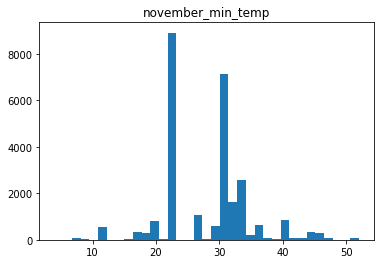

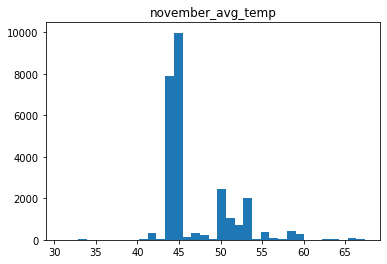

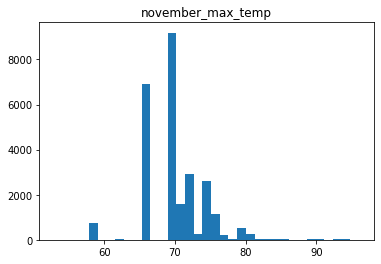

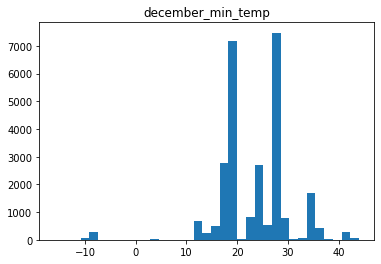

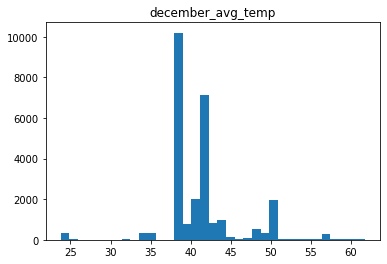

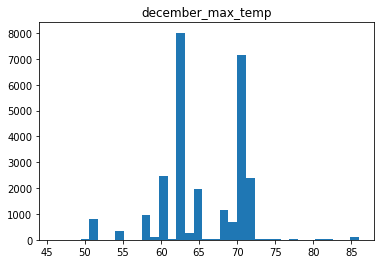

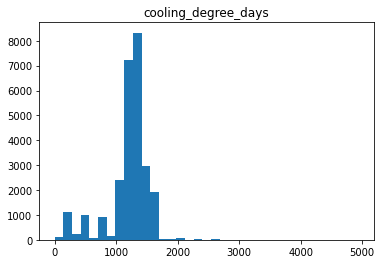

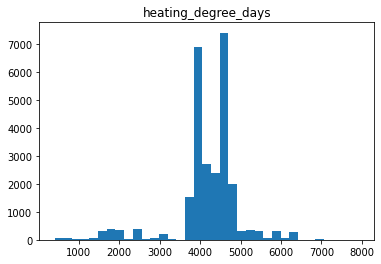

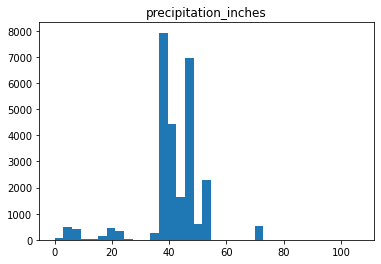

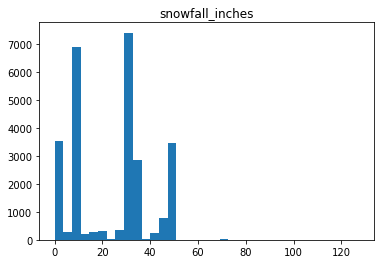

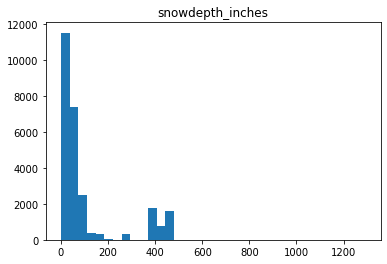

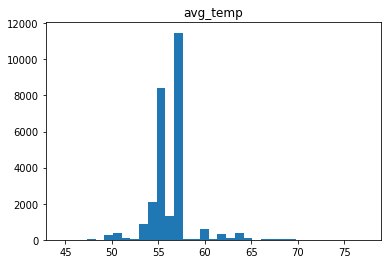

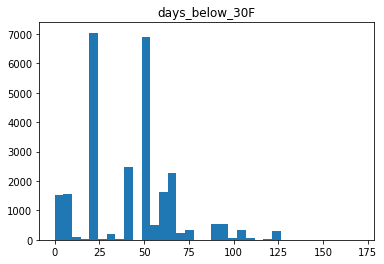

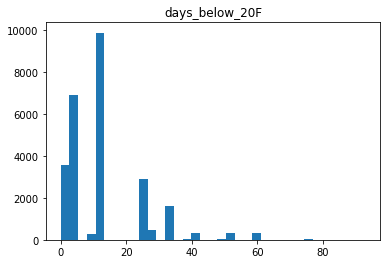

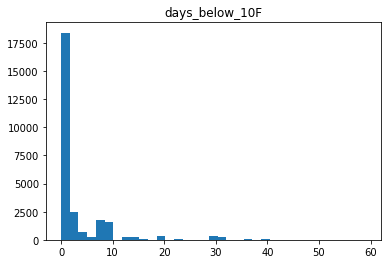

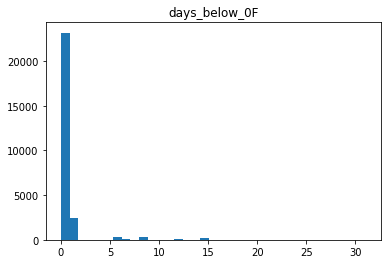

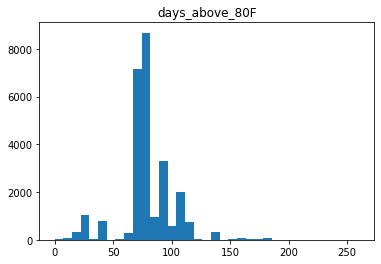

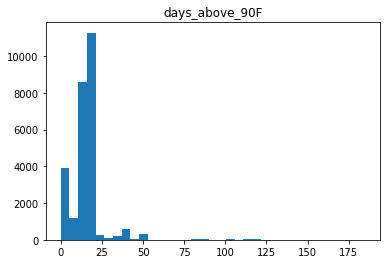

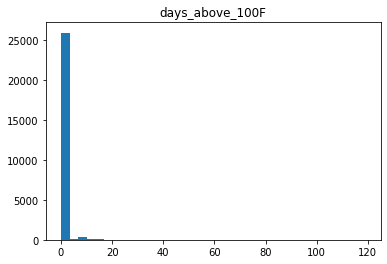

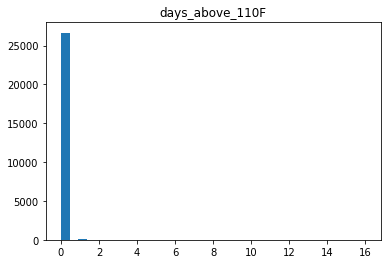

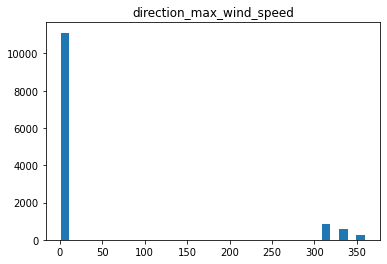

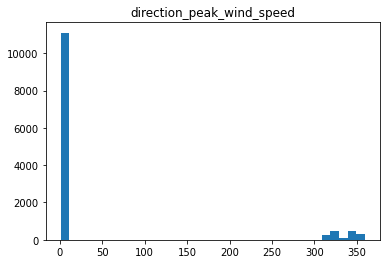

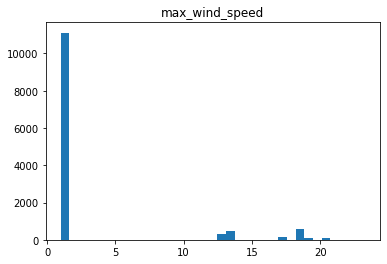

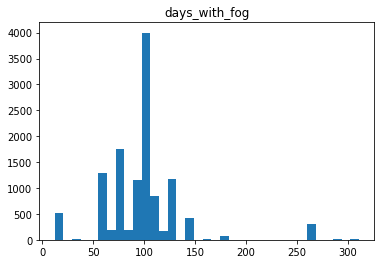

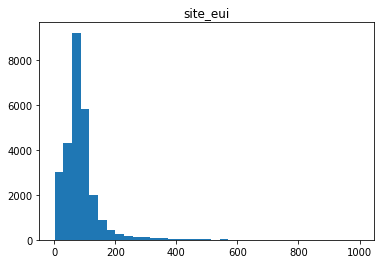

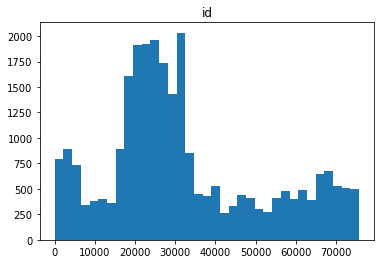

In [51]:
distribution_plots(dat2)

In [30]:
# Energy star rating
sub2 = sub.loc[sub["energy_star_rating"].isnull()]
del sub2["energy_star_rating"]

In [ ]:
distribution_plots(sub2)

In [37]:
sub1 = sub.loc[sub["Year_Factor"] == 7]
del sub1["Year_Factor"]

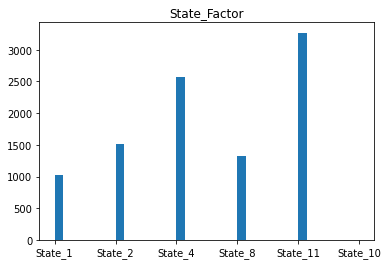

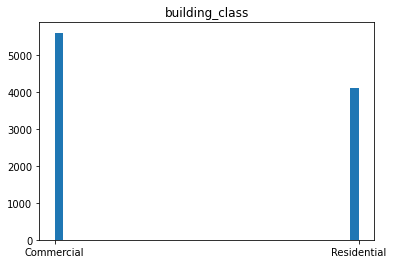

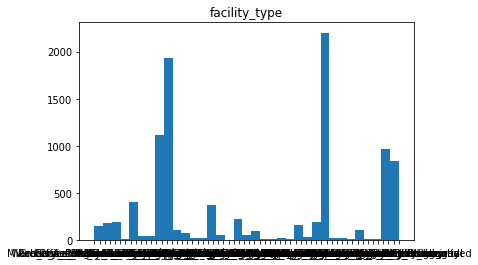

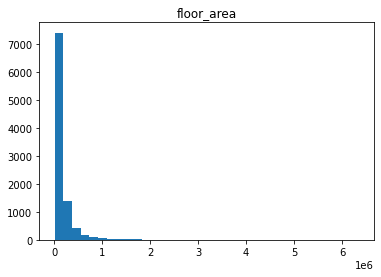

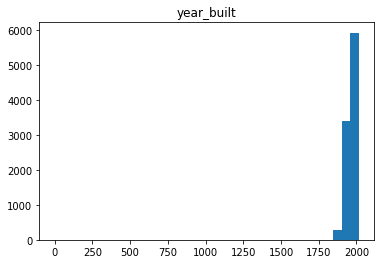

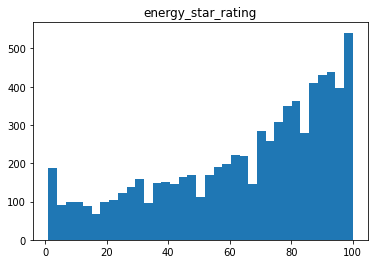

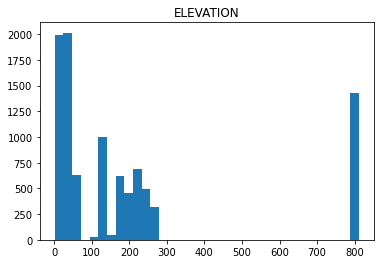

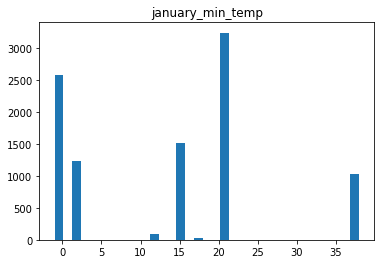

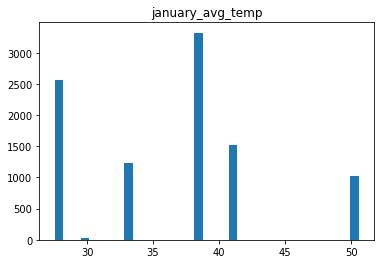

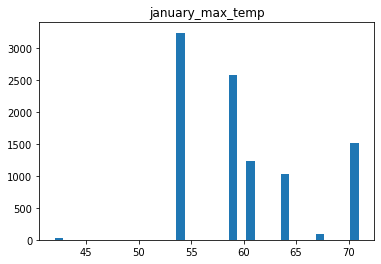

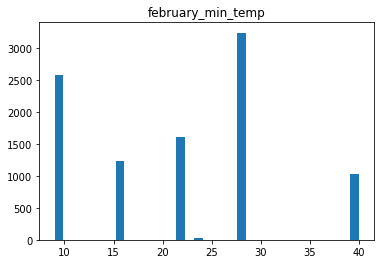

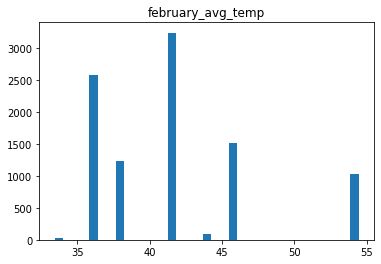

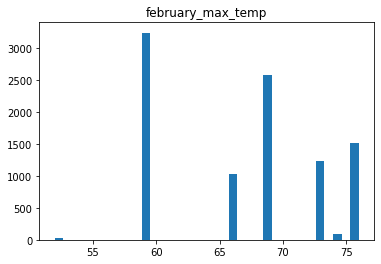

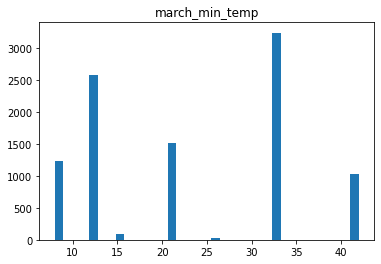

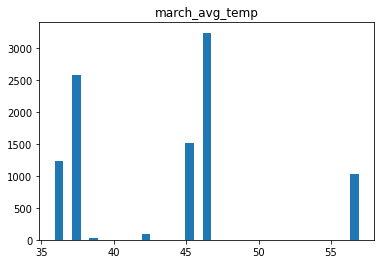

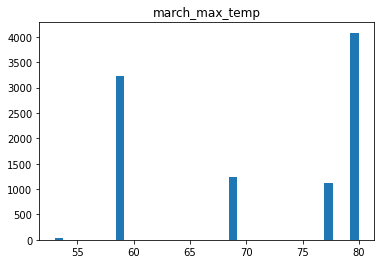

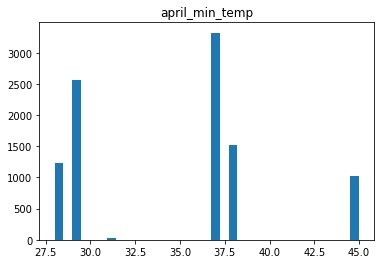

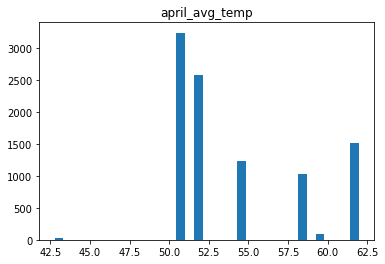

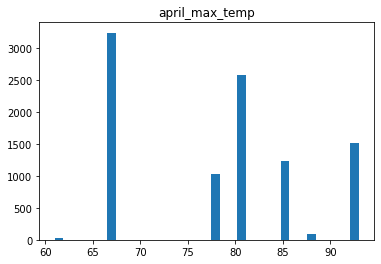

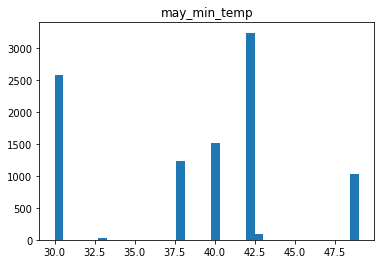

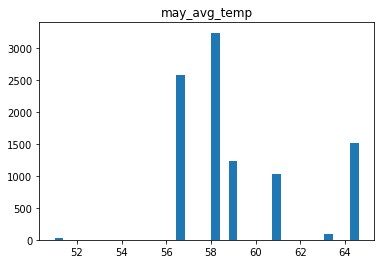

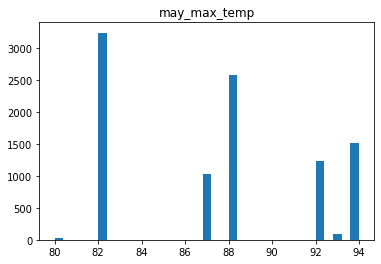

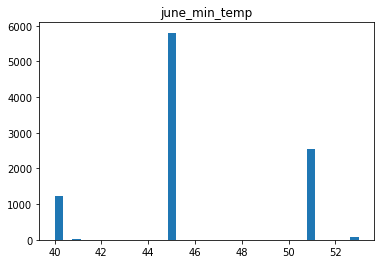

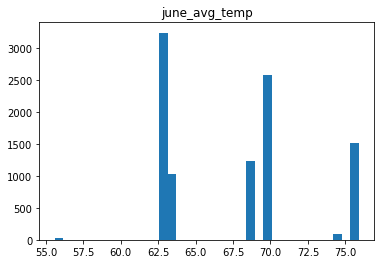

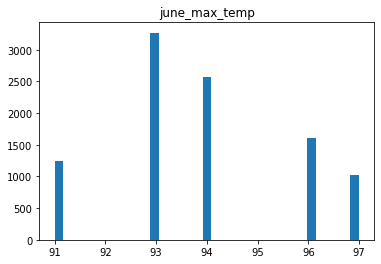

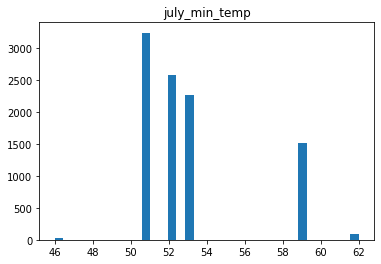

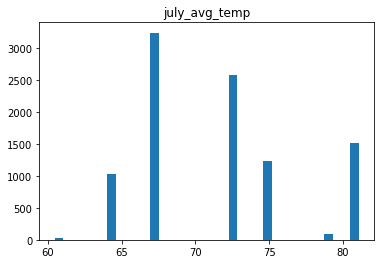

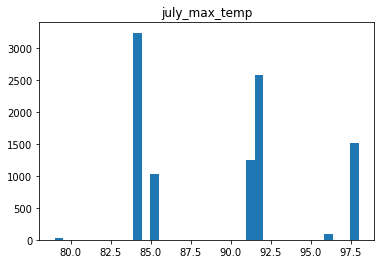

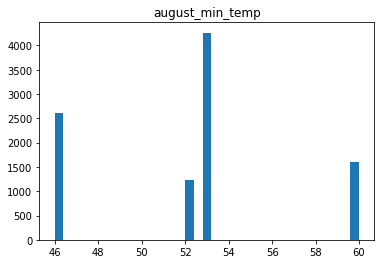

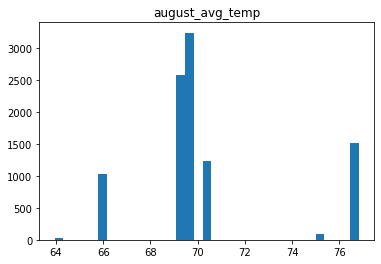

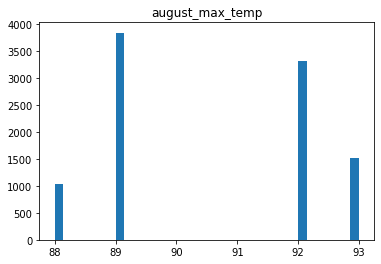

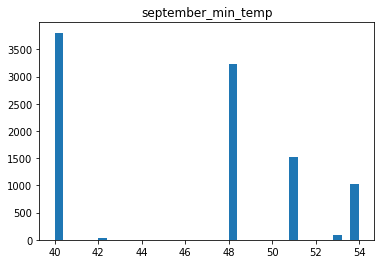

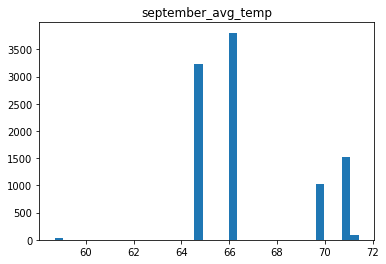

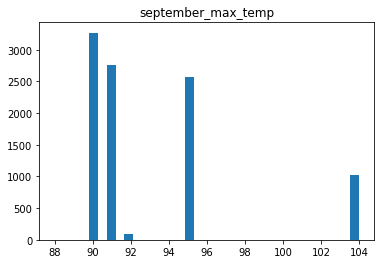

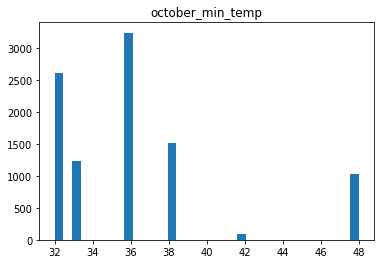

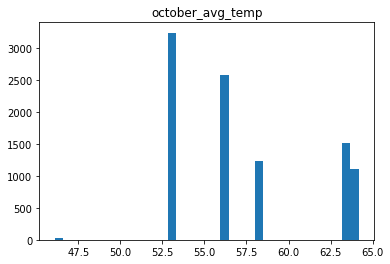

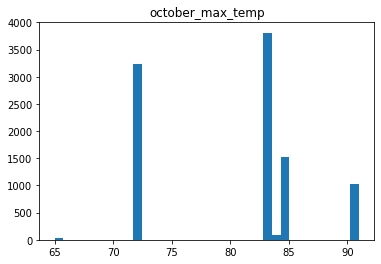

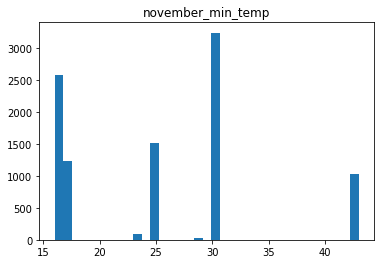

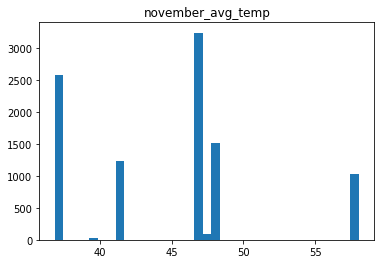

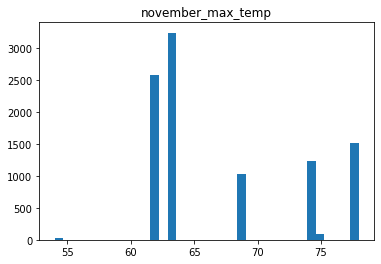

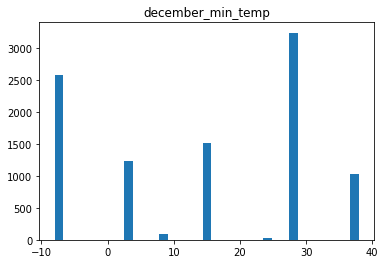

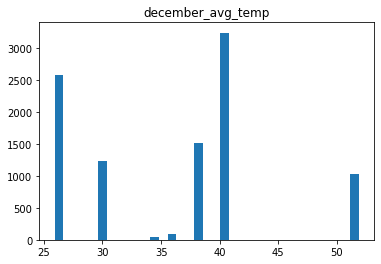

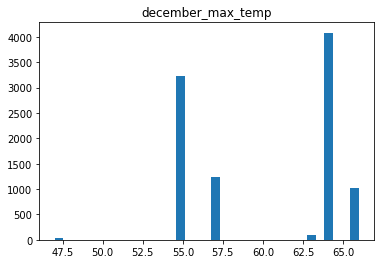

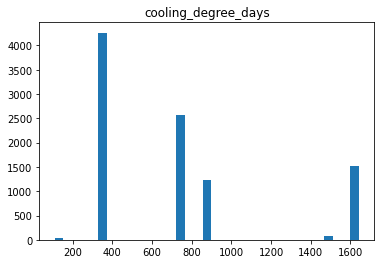

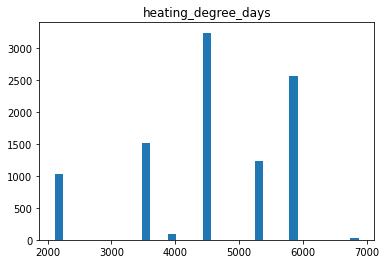

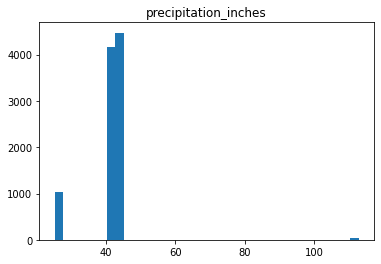

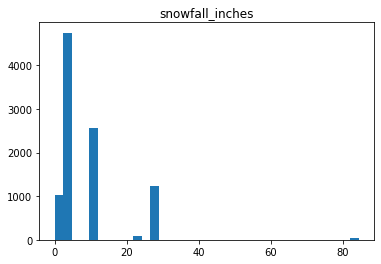

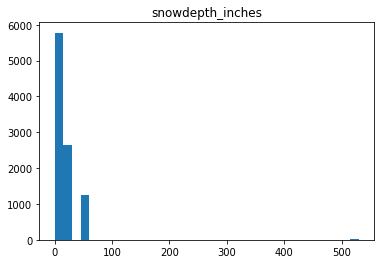

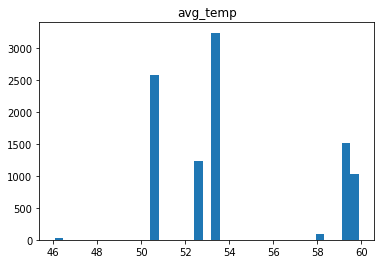

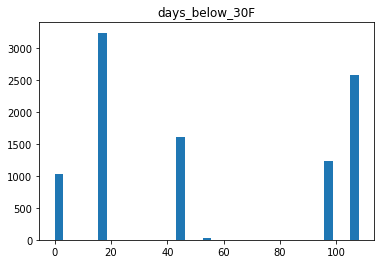

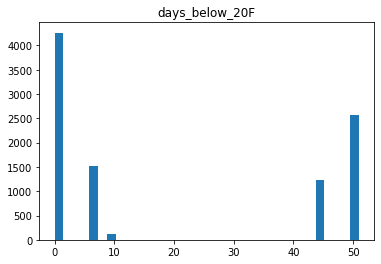

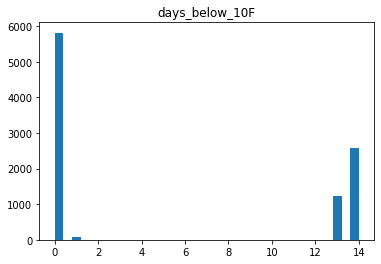

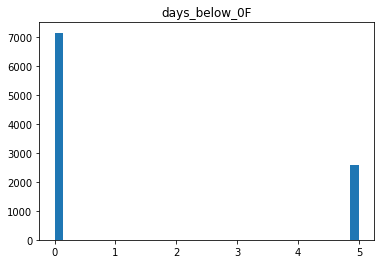

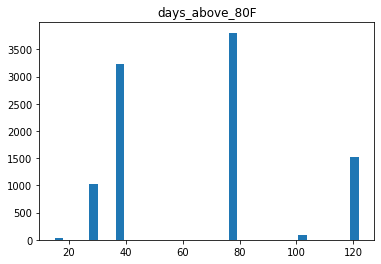

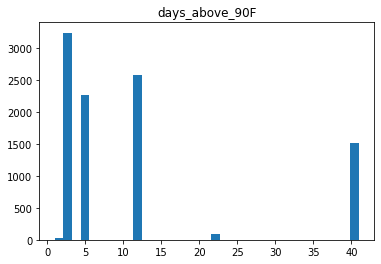

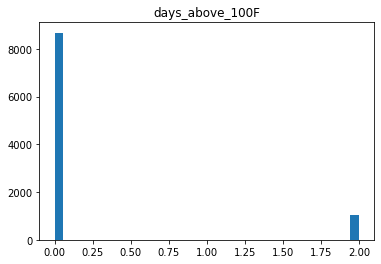

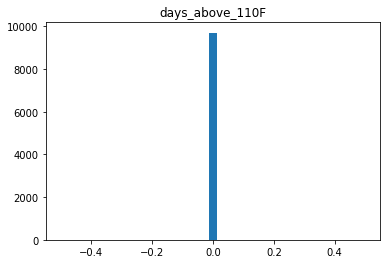

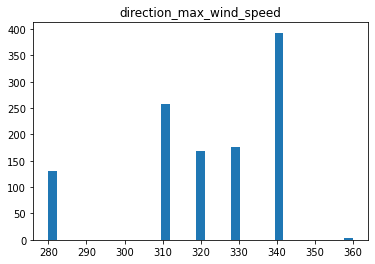

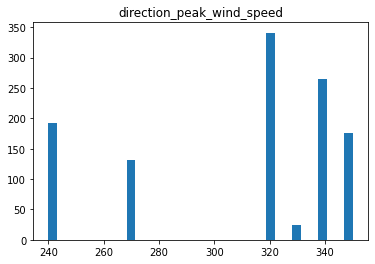

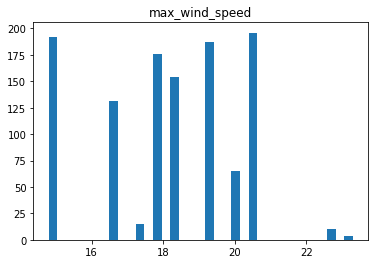

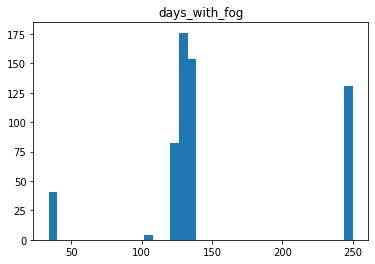

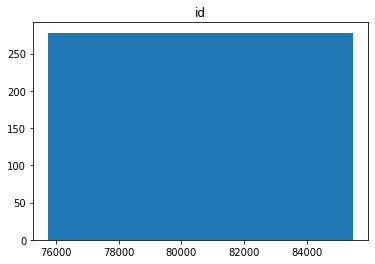

In [38]:
distribution_plots(sub1)

In [35]:
sub3 = sub.loc[sub["State_Factor"] == "State_11"]
del sub3["State_Factor"]

# State 11 is only in year factor 7, so for state_11 all energy ratings are missing
# Small houses


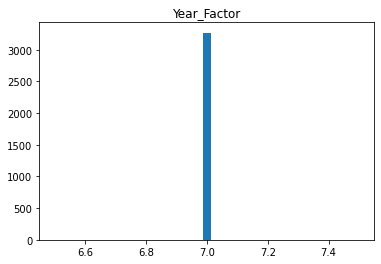

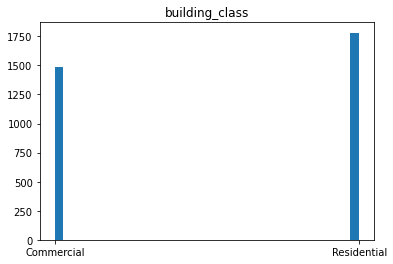

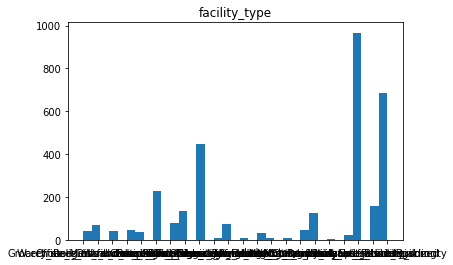

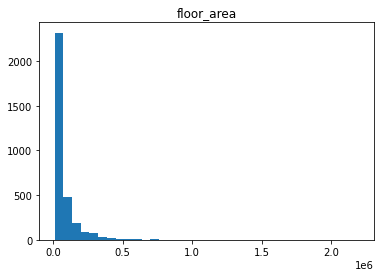

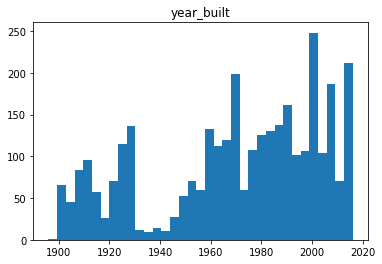

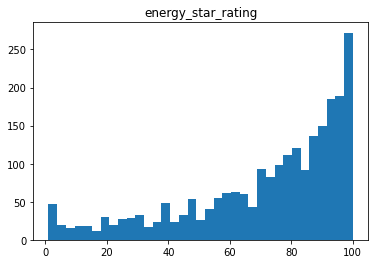

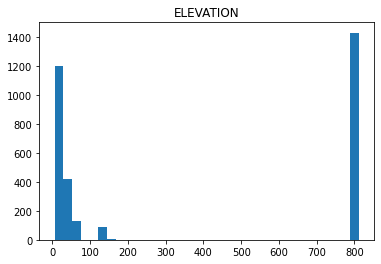

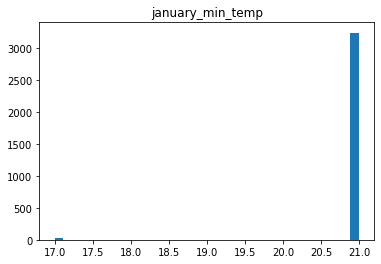

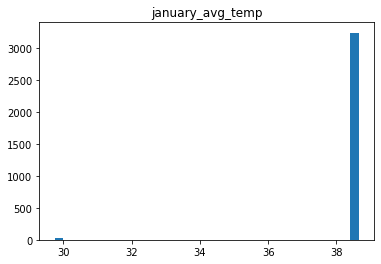

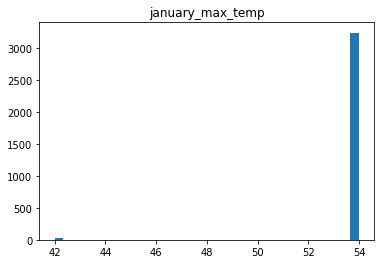

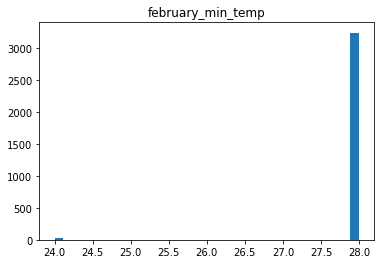

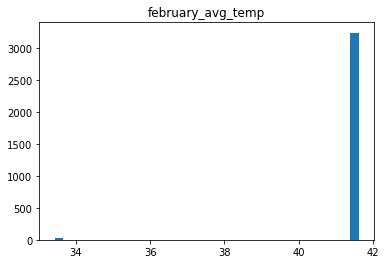

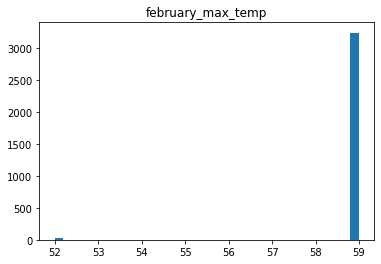

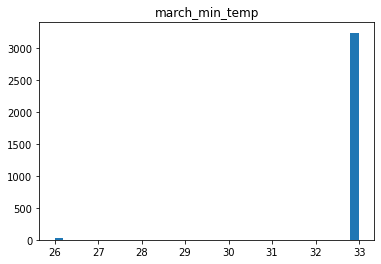

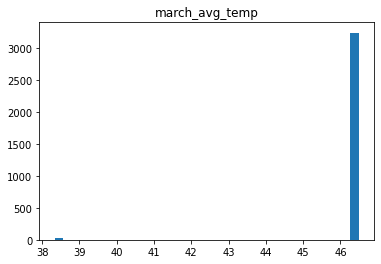

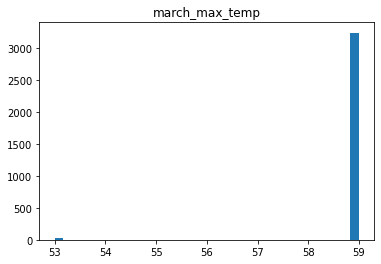

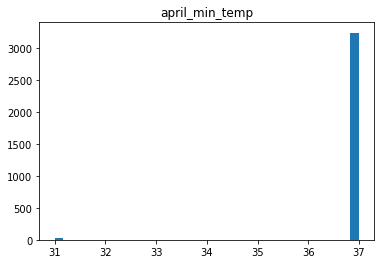

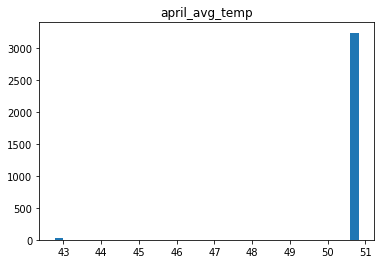

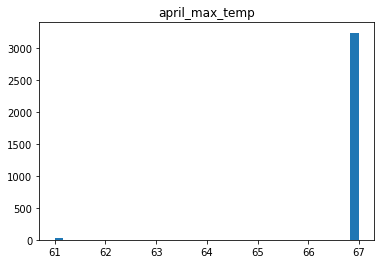

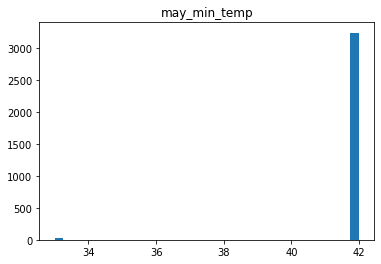

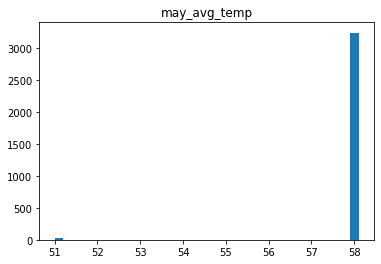

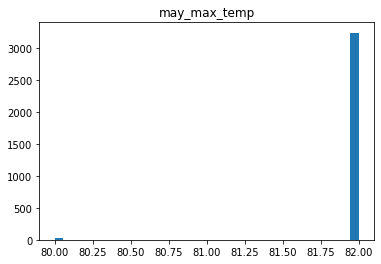

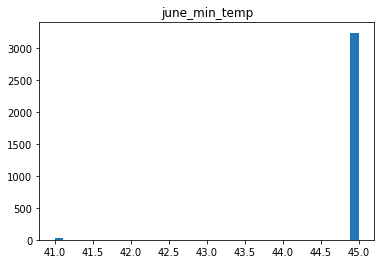

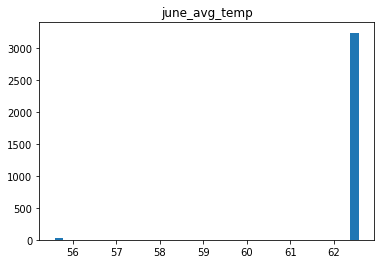

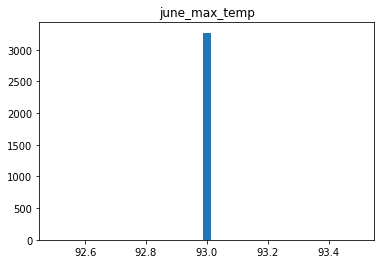

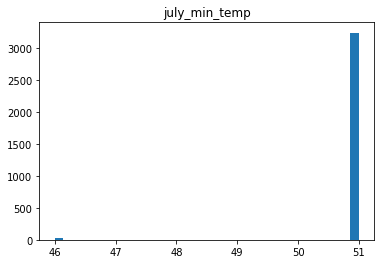

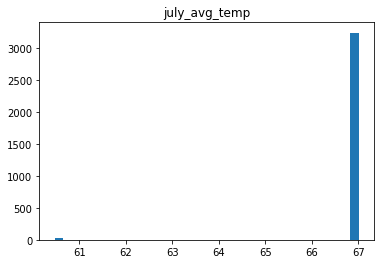

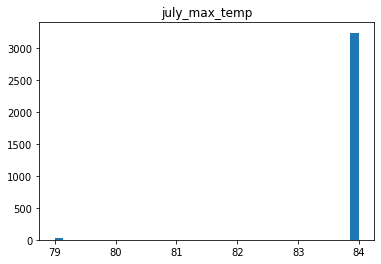

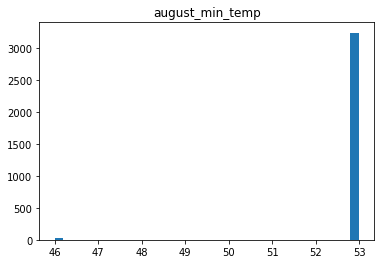

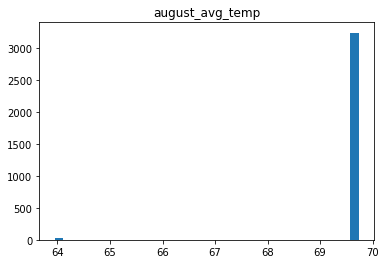

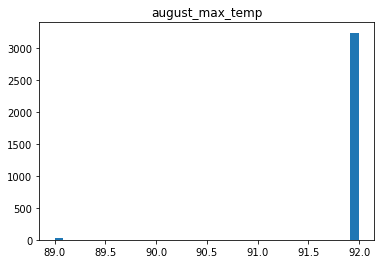

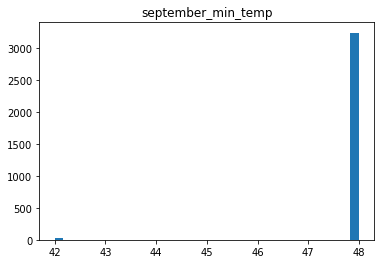

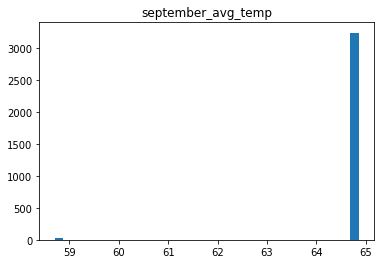

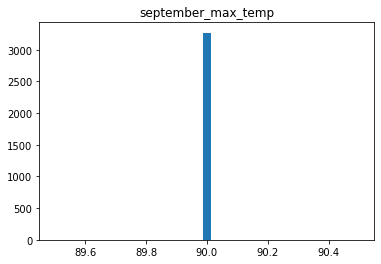

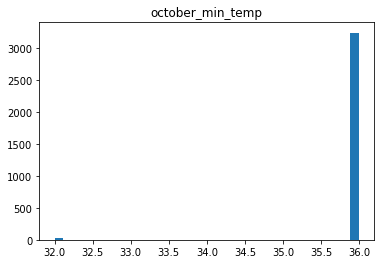

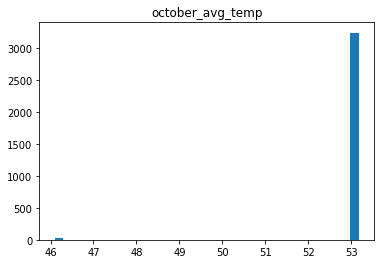

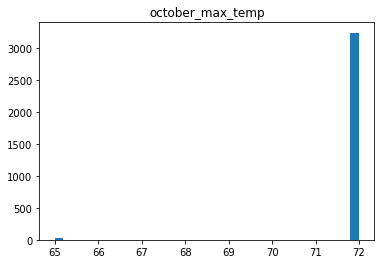

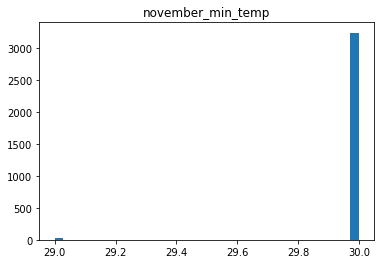

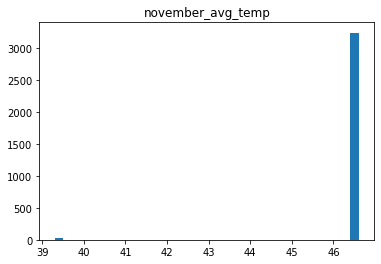

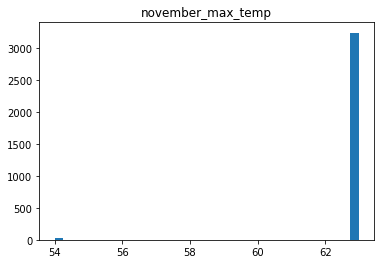

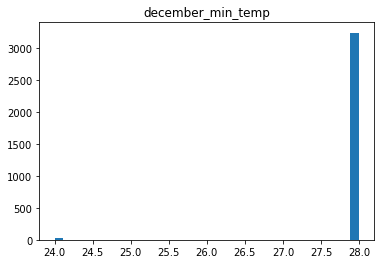

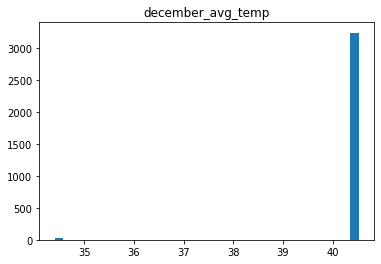

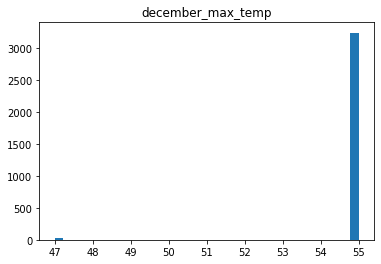

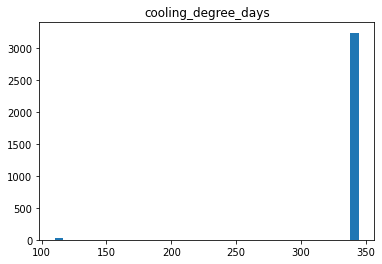

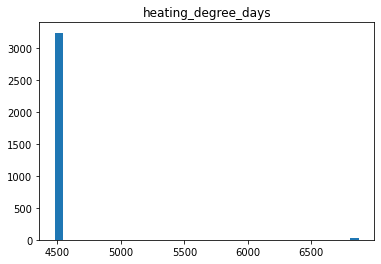

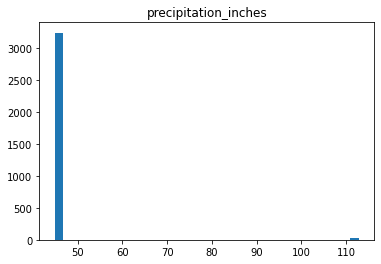

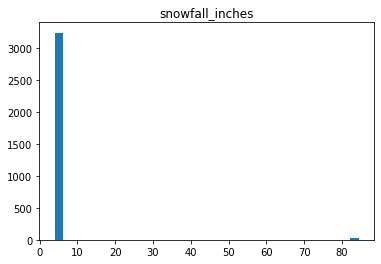

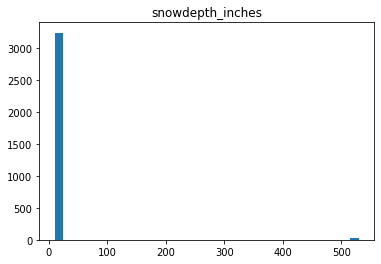

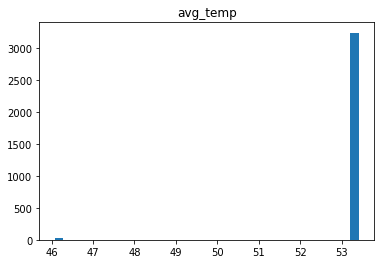

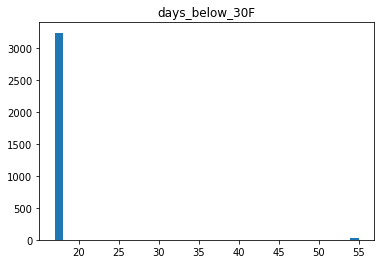

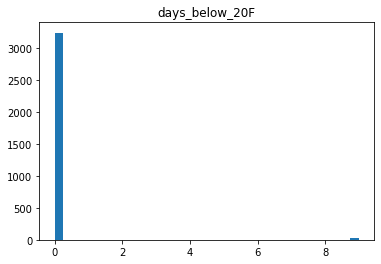

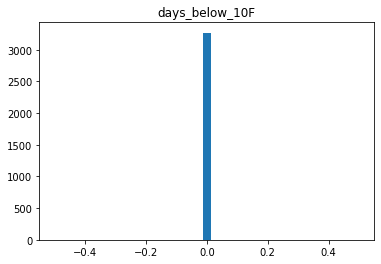

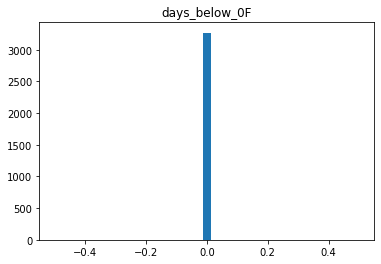

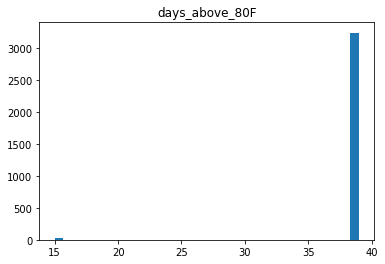

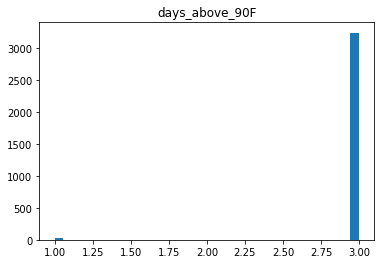

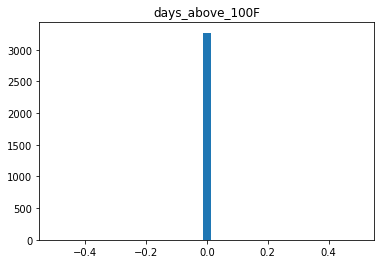

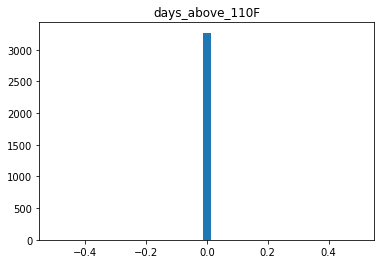

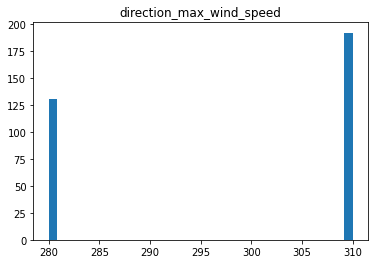

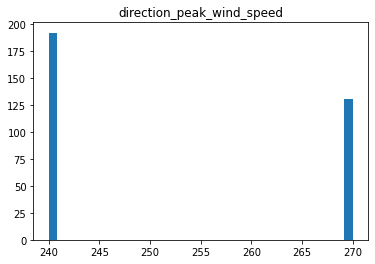

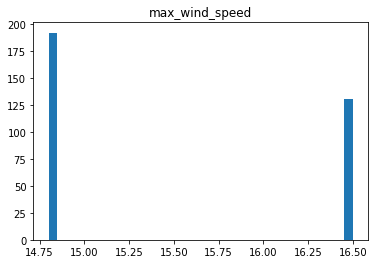

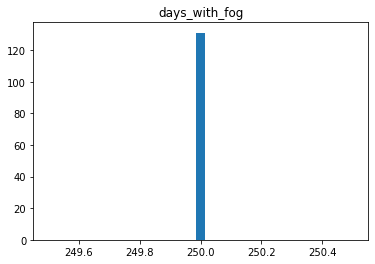

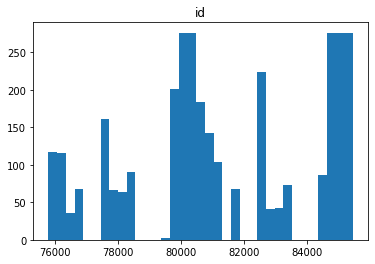

In [36]:
distribution_plots(sub3)

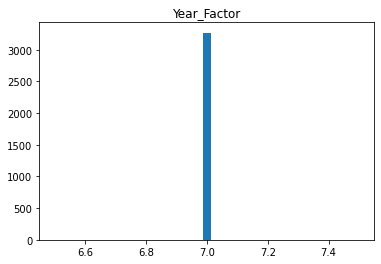

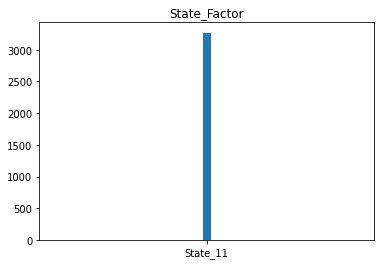

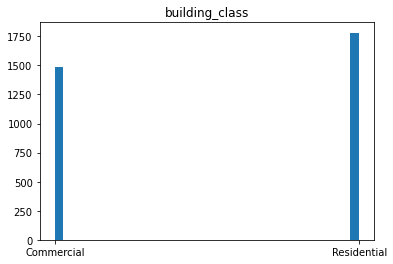

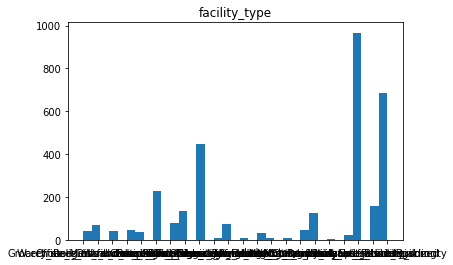

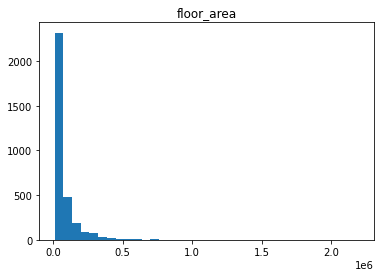

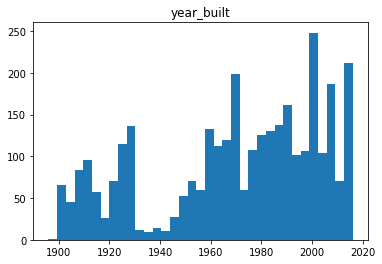

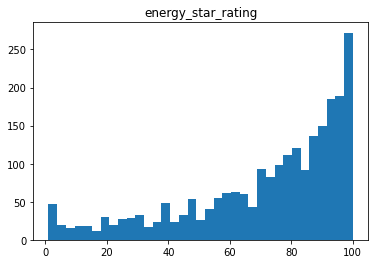

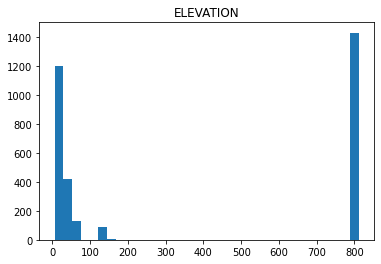

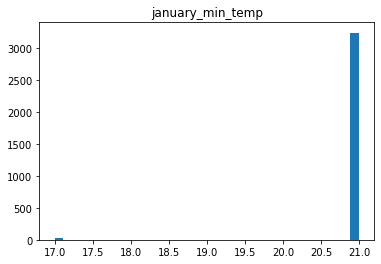

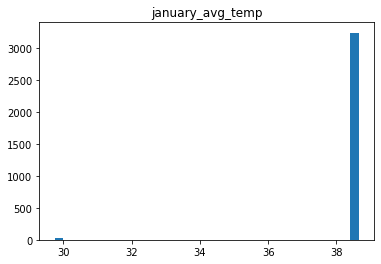

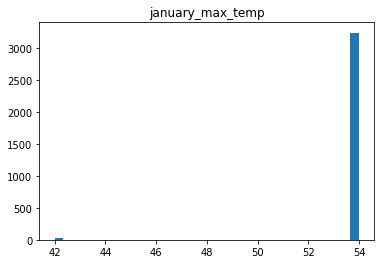

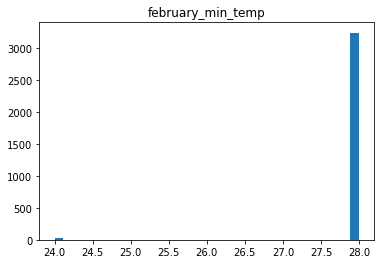

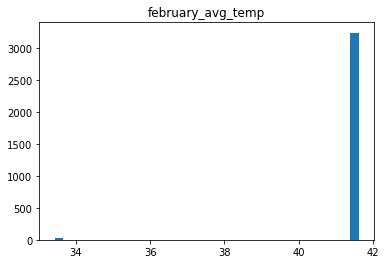

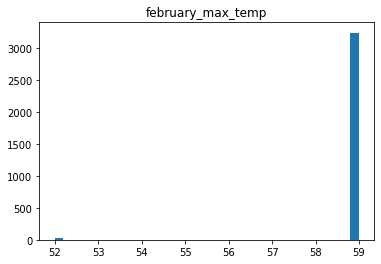

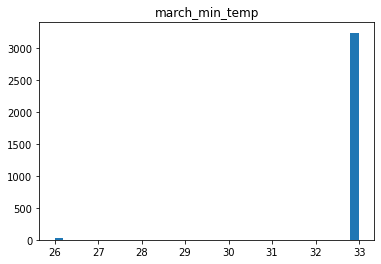

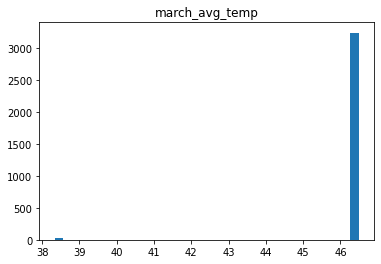

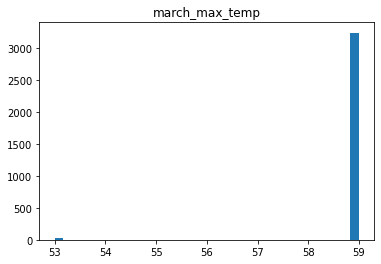

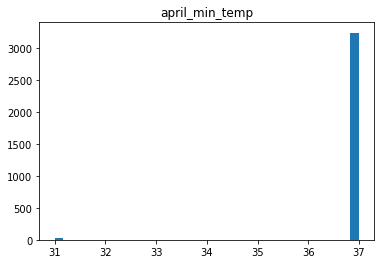

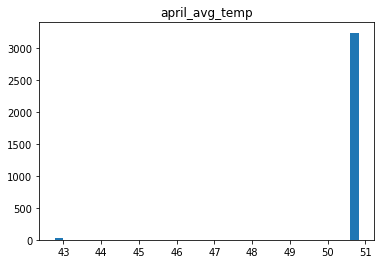

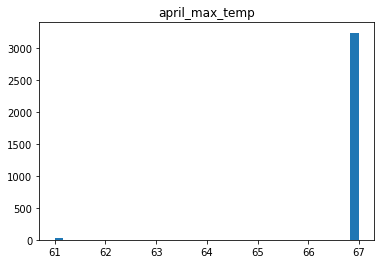

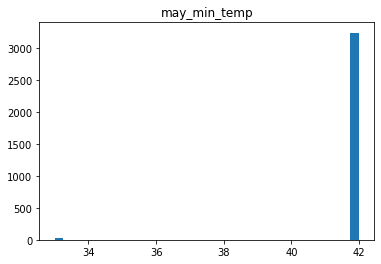

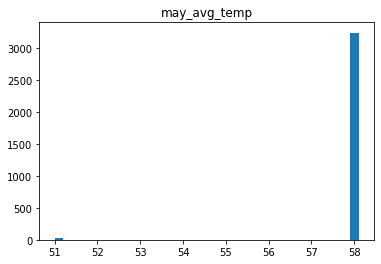

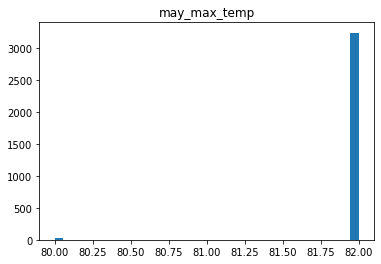

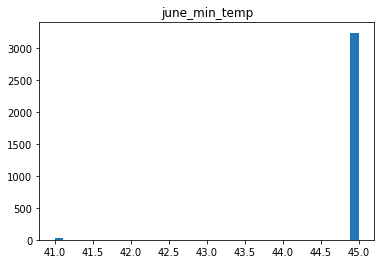

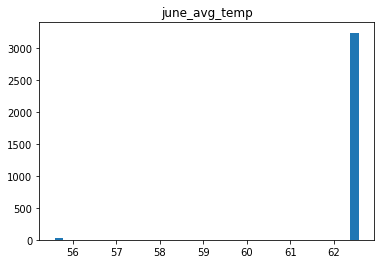

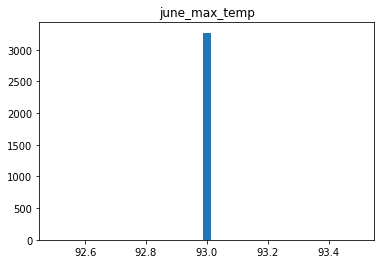

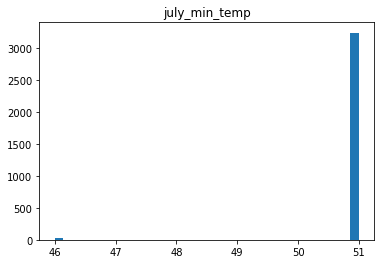

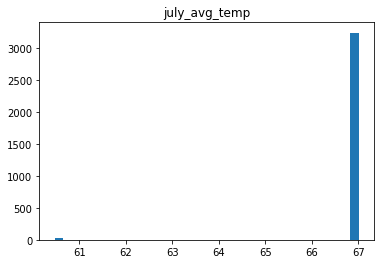

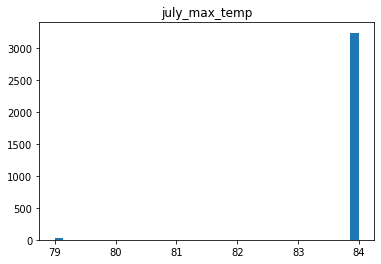

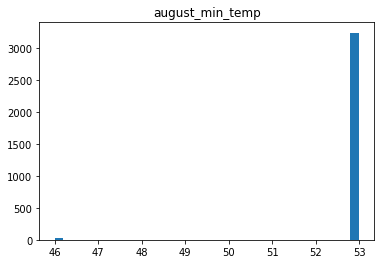

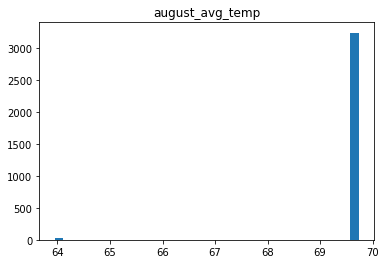

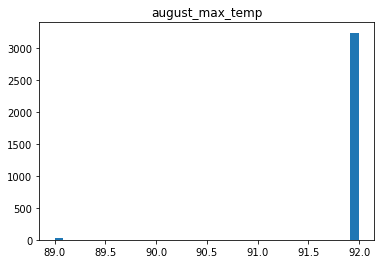

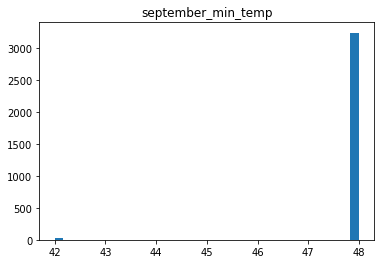

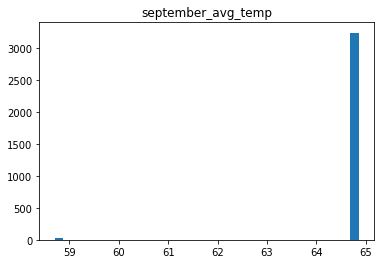

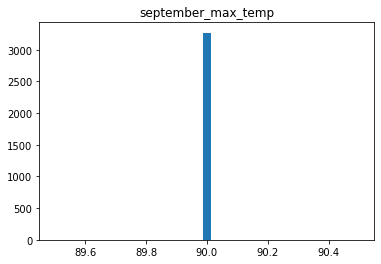

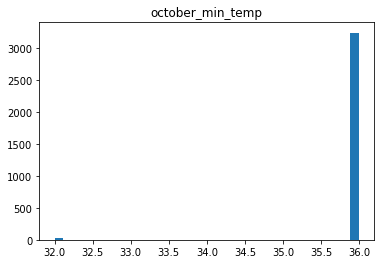

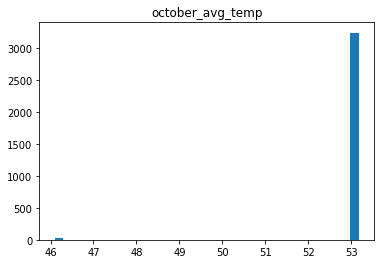

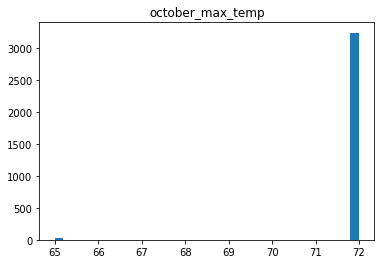

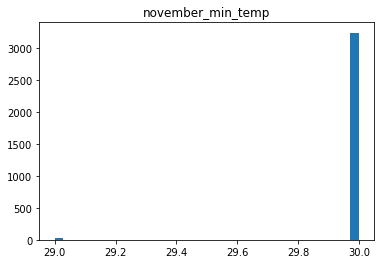

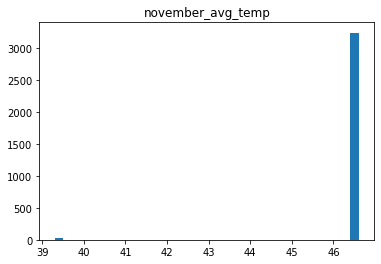

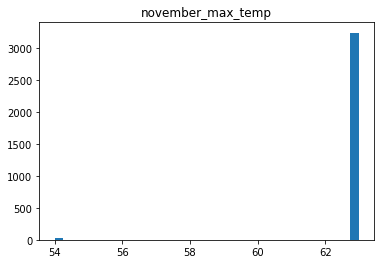

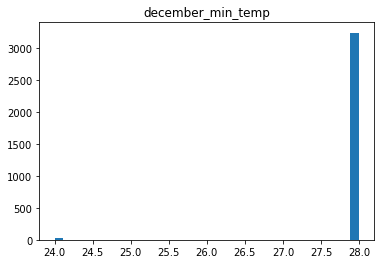

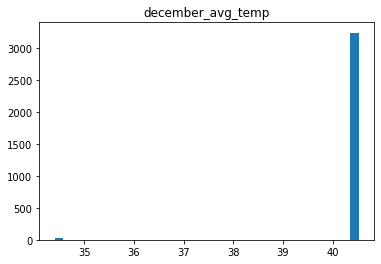

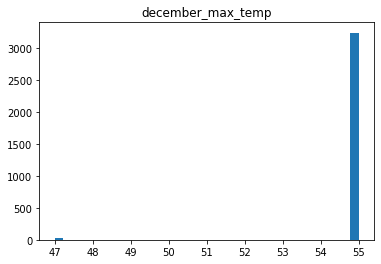

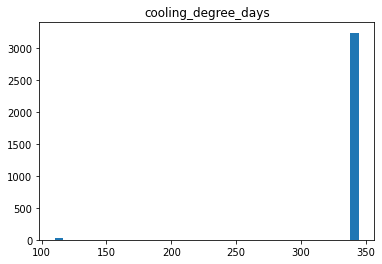

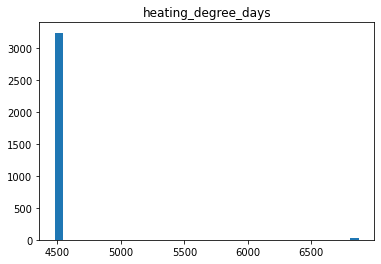

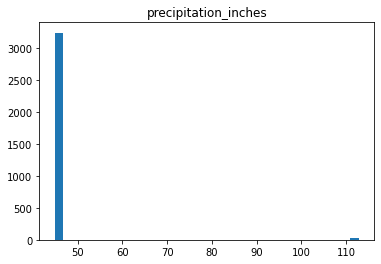

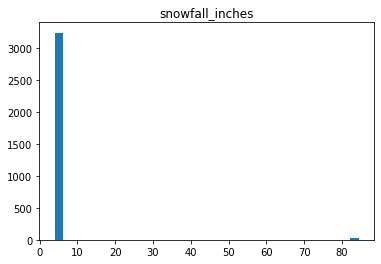

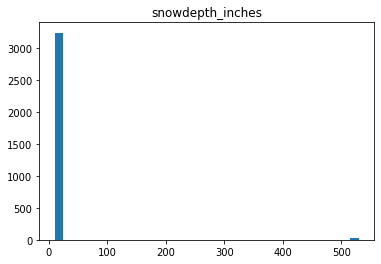

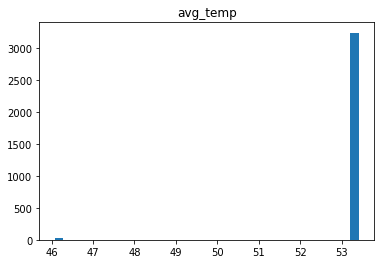

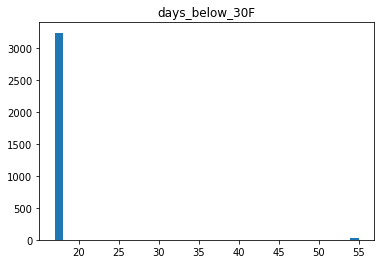

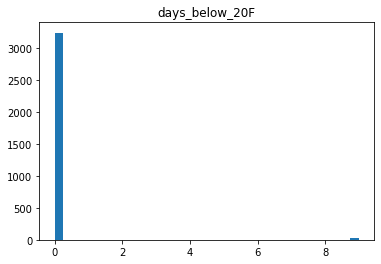

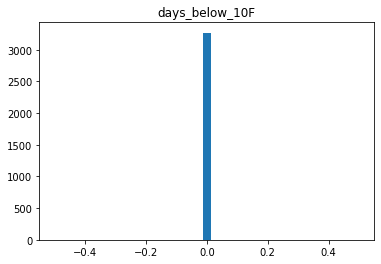

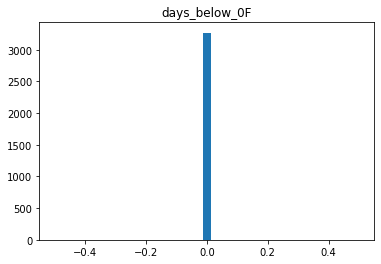

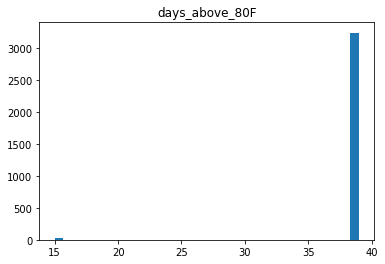

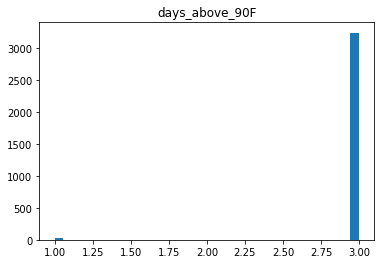

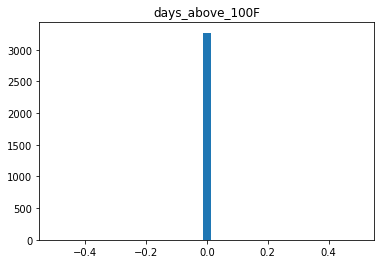

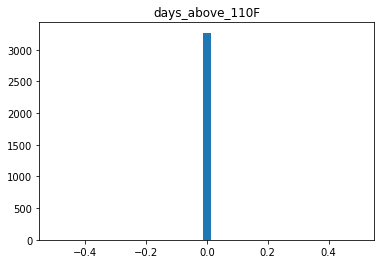

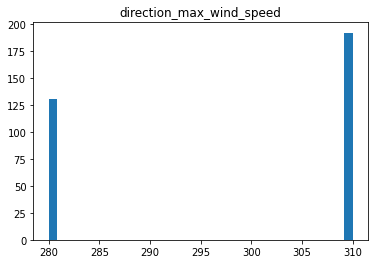

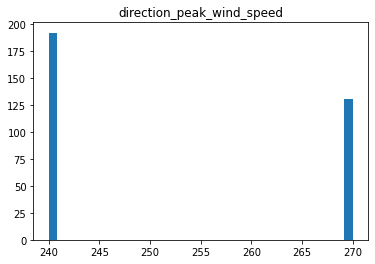

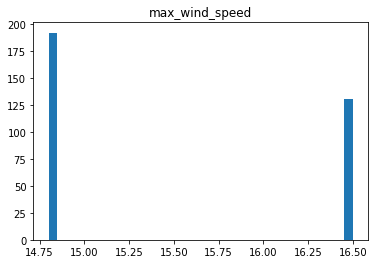

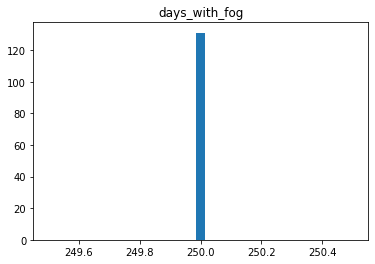

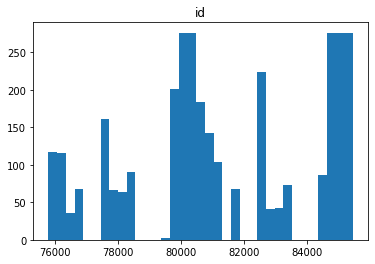

In [39]:
sub4 = sub.loc[sub["Year_Factor"] == 7]
sub4 = sub4.loc[sub4["State_Factor"] == "State_11"]
distribution_plots(sub4)

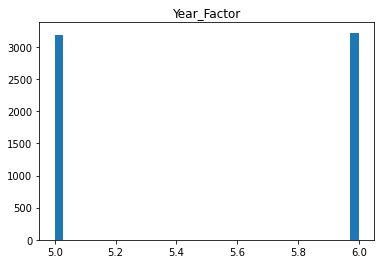

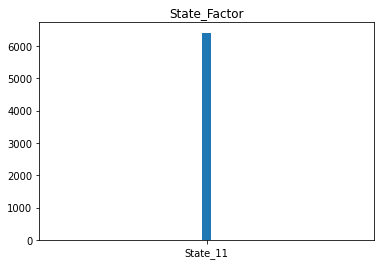

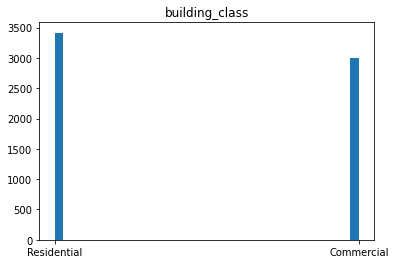

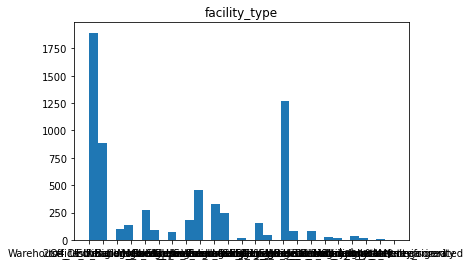

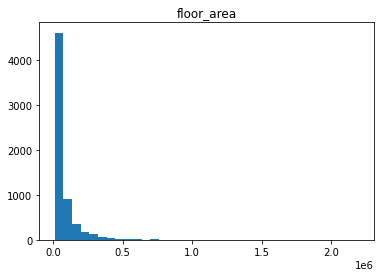

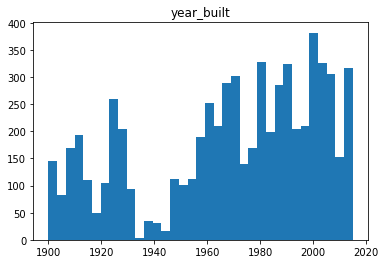

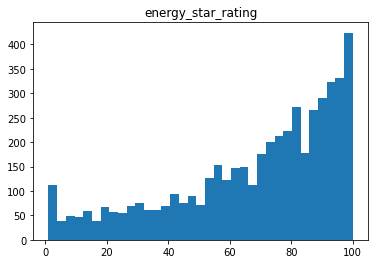

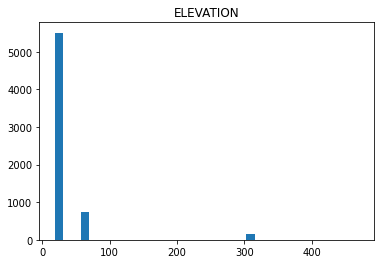

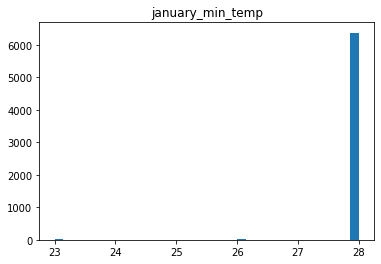

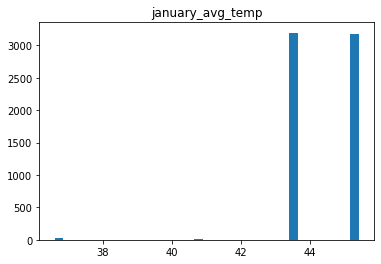

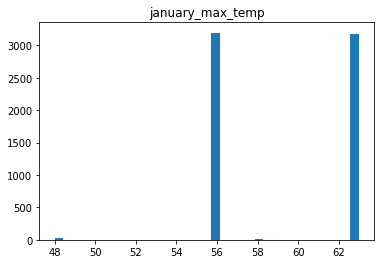

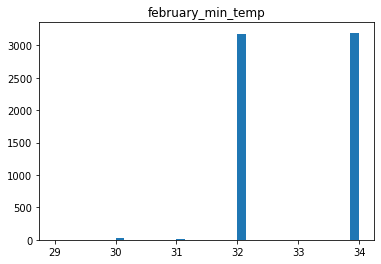

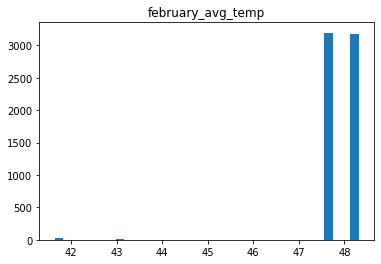

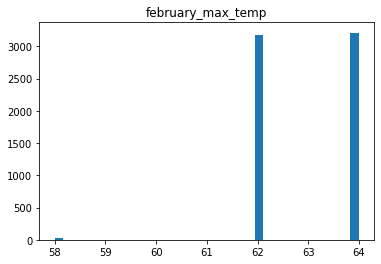

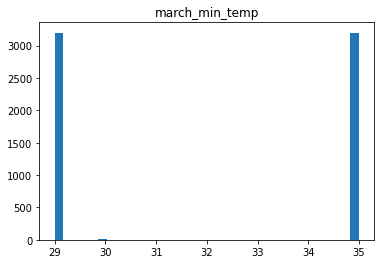

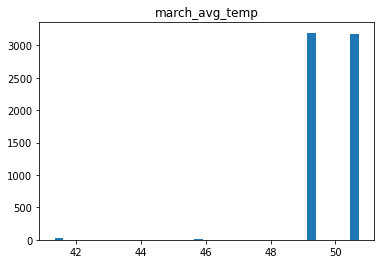

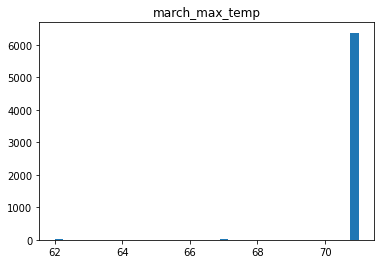

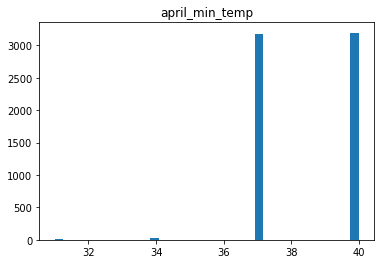

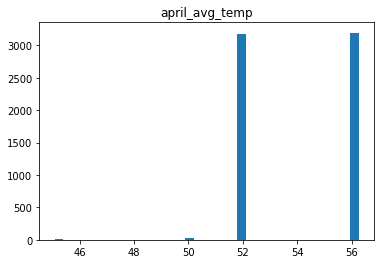

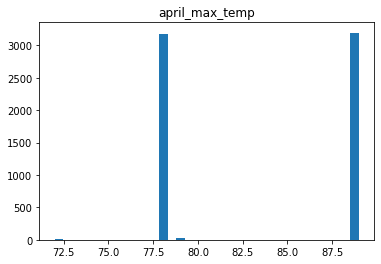

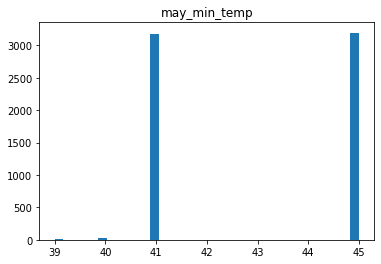

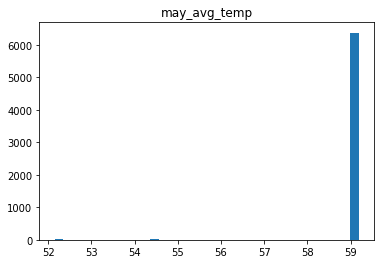

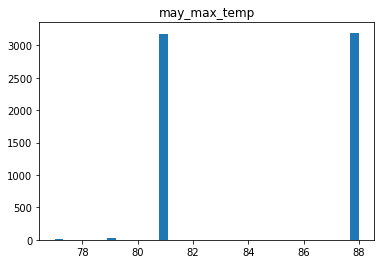

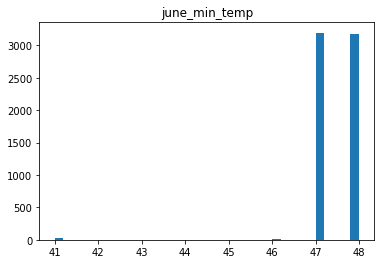

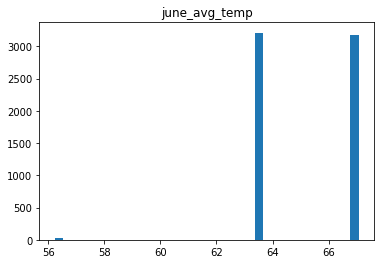

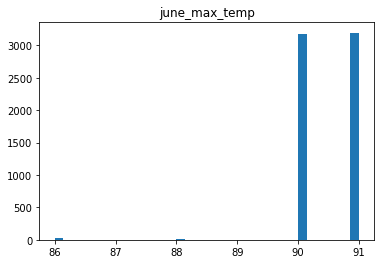

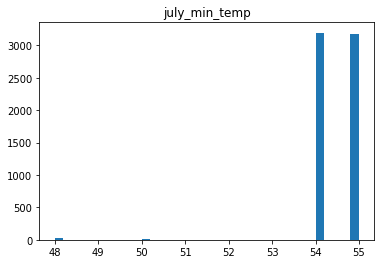

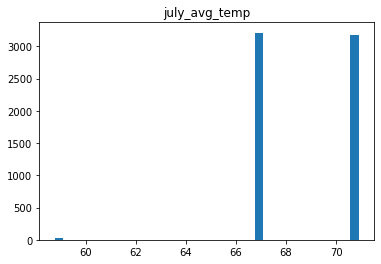

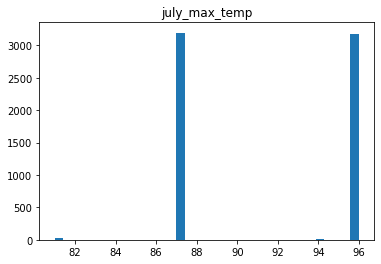

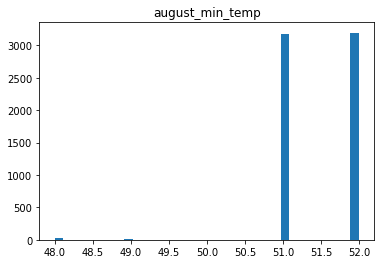

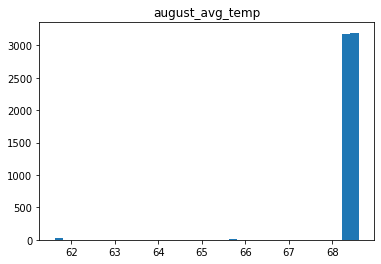

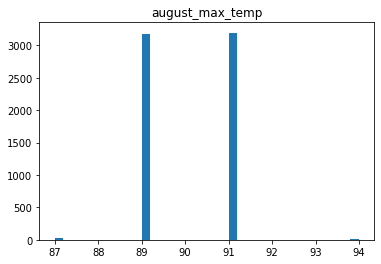

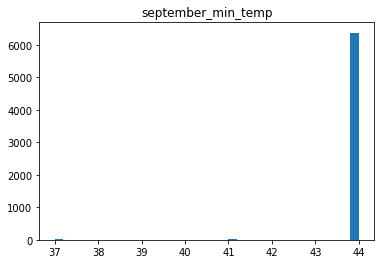

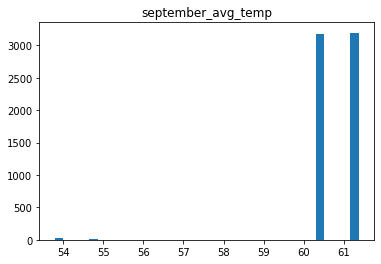

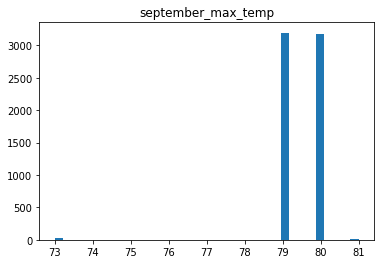

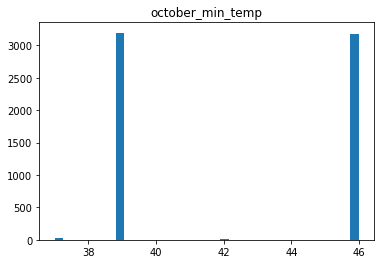

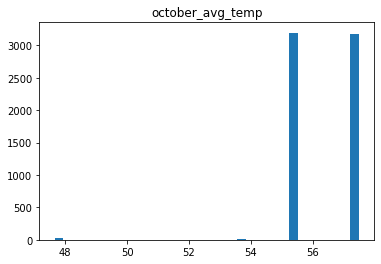

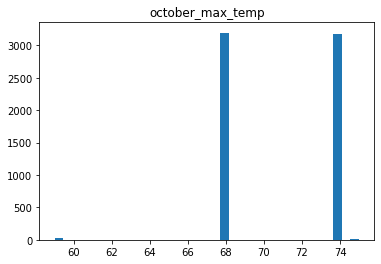

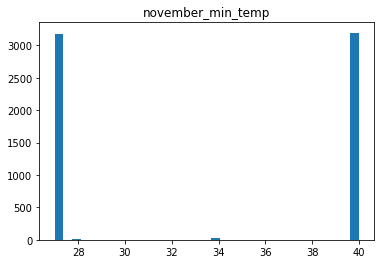

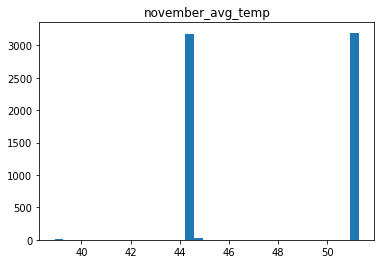

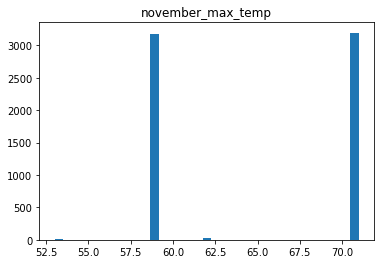

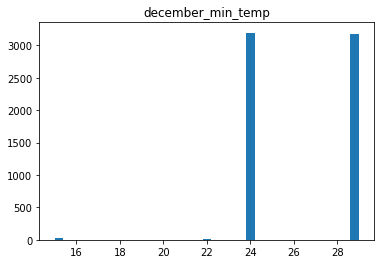

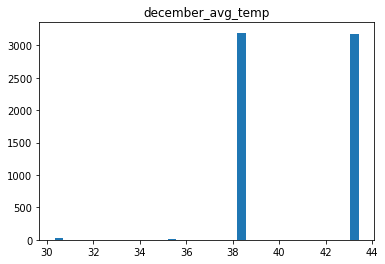

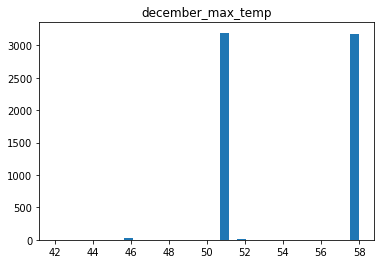

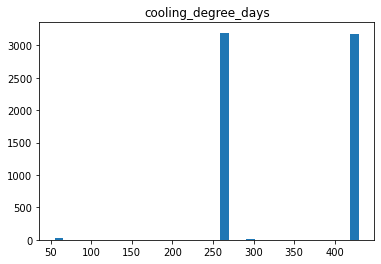

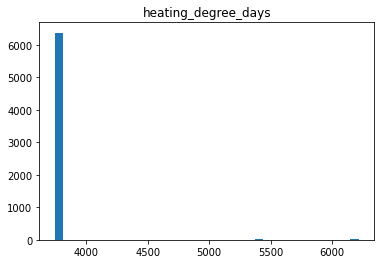

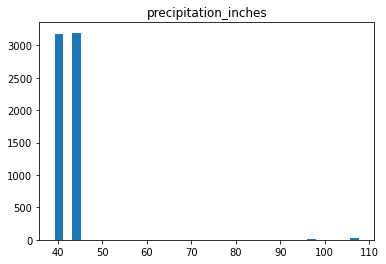

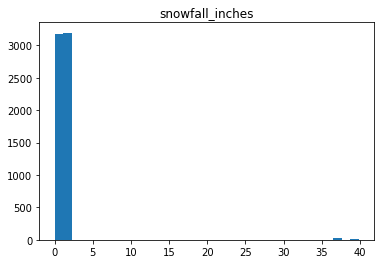

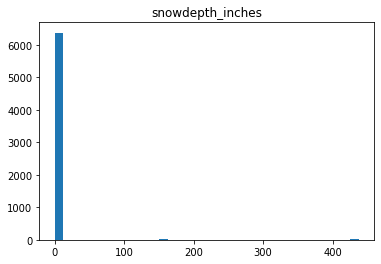

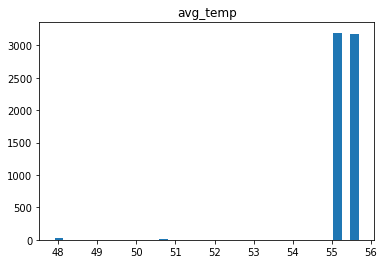

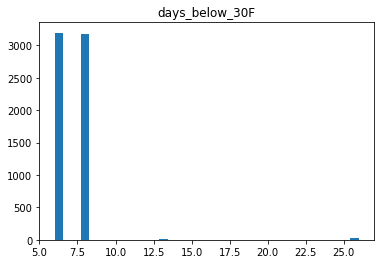

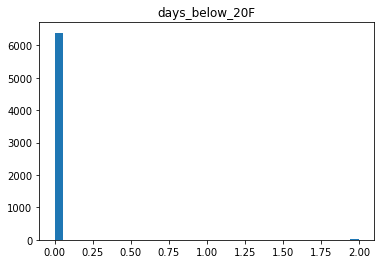

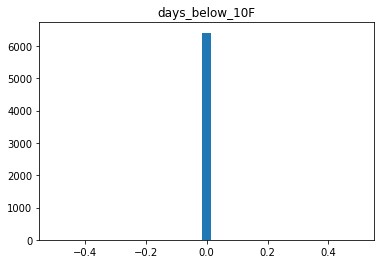

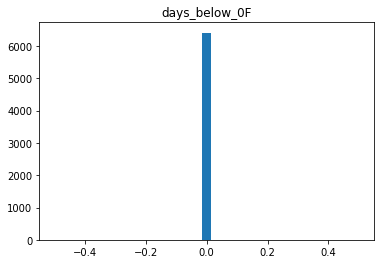

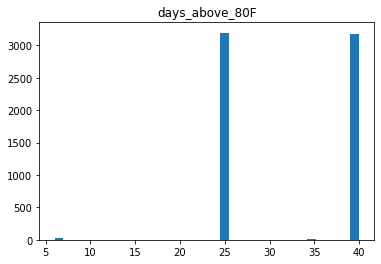

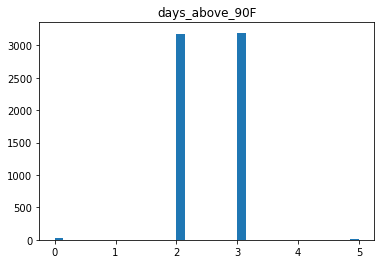

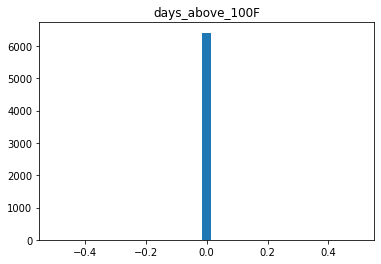

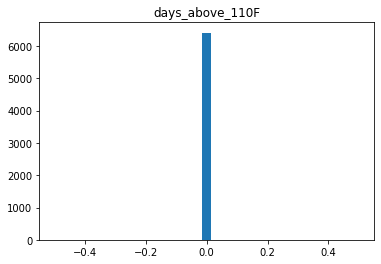

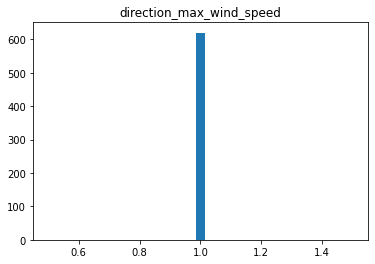

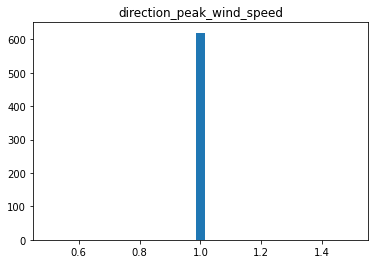

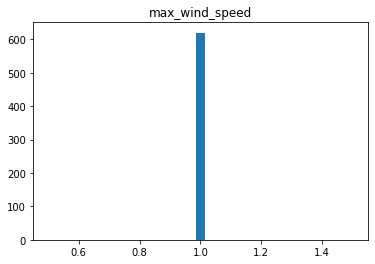

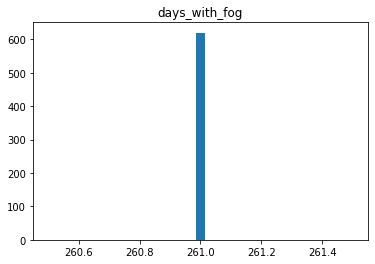

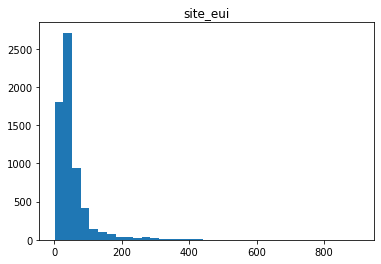

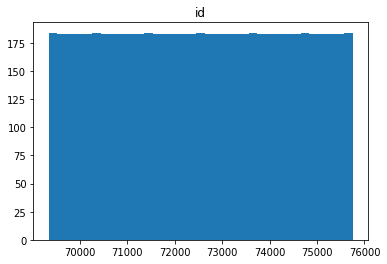

In [44]:
data1 = data.loc[data["State_Factor"] == "State_11"]
data1 = data1.loc[data1["State_Factor"] == "State_11"]
distribution_plots(data1)

In [47]:
print(data1.energy_star_rating.median())
print(data1.energy_star_rating.mode())
print(data1.energy_star_rating.mean())

76.0
0    100.0
dtype: float64
68.04637385086824


In [45]:
for i in check_correlation(data1, "site_eui", 0):
    print(i)

Correlations of 'site_eui':
('site_eui', 1.0)
('energy_star_rating', 0.3351423841004087)
('march_max_temp', 0.07298575789921581)
('heating_degree_days', 0.07235917585762462)
('floor_area', 0.07183882266992621)
('may_avg_temp', 0.07133528753605602)
('snowdepth_inches', 0.07129827860548366)
('snowfall_inches', 0.06925524586382557)
('august_avg_temp', 0.06924603595554926)
('days_below_20F', 0.06718556828925075)
('avg_temp', 0.06616021792274543)
('precipitation_inches', 0.06335177267538655)
('february_avg_temp', 0.061227395556089956)
('september_min_temp', 0.058841076252079745)
('january_min_temp', 0.05744778177454348)
('july_min_temp', 0.051845406005545804)
('days_below_30F', 0.050910761653933045)
('march_avg_temp', 0.04971565275653652)
('september_avg_temp', 0.04858726415852662)
('june_min_temp', 0.04786281975718679)
('september_max_temp', 0.04198816956887836)
('october_avg_temp', 0.037671887681456)
('january_avg_temp', 0.037638601932823396)
('june_max_temp', 0.03190813609670152)
('ELEVA